<h1>Predicting game prices</h1>
<h5 style="margin-left: 2rem">By: Elad Ben-Haim, Shalev Hadar</h5>
<br/>
<br/>

<h4>נושא המחקר</h4>
<table dir="rtl">
    <tr>
        <th>
            נושא המחקר
        </th>
        <th>
            פירוט הנושא
        </th>
    </tr>
    <tr>
        <td>
        האם ניתן לחזות מחיר של משחק בעוד x זמן?
        </td>
        <td>
        מתי הכי ישתלם לקנות את המשחק בעתיד
        </td>
    </tr>
    <tr>
        <td>
        האם ניתן לחזור מתי למוכר הכי משתלם לעשות מבצע על המשחק?
        </td>
        <td>
        מתי הכי כדאי למוכר לעשות מבצע כדי להביא עוד שחקנים ולהמשיך למכור עם הרווח הגדול ביותר
        </td>
    </tr>
</table>
<br/>

<br/>

<h4>נתוני המחקר ודרכי ניתוח</h4>
<table dir="rtl">
    <tr>
        <th>
            נתוני המחקר & דרכי ניתוח
        </th>
        <th>
             ואיך ננתח אותם
        </th>
    </tr>
    <tr>
        <td>
		פירוט הנתונים: פרטים פיננסיים הוא נמכר בזמן X ואז לחזות בכמה הוא ימכר בזמן Y ובנוסף פרטים על המשחק - כמו שם, ז'אנר פופולריות וכו'.
        </td>
        <td>
            <p style="font-size: 1.1rem">
                נשתמש ב-Crawling על אתר isThereAnyDeal(Fig.3)<br/>
                כדי לא לקבל הודעת שגיאה על שימוש יתר, נשתמש ב-PROXY כדי לא להחסם ע"י isThereAnyDeal<br/>
                ונייבא משם את כל המידע הדרוש כדי לחזות את המחיר של משחק בעוד X זמן מסוים.<br/>
                ראינו שלכל משחק קיים באיזור ה1000+ (Fig.2) רשומות של log (Fig.1) של המחיר שלו ביחס לזמן, ולחנות בה הוא נמכר ואת העלייה\ירידה במחיר של המשחק ביחד ללוג הקודם.<br/>
                בעזרת STEAM API נוציא את ז'אנר המשחק, שנת הייצור ועוד פרטים מורכבים יותר על המשחק עצמו<br/>
                ולבסוף נצרף לכל לוג את פרטי המשחק ונקבל Dataset בגודל n = כמות המשחקים, x = כמות הלוגים, כלומר n*x<br/>
                אנחנו מעוניינים כרגע לקחת את 100 המשחקים הראשונים ולפי מה שראינו כמות הלוגים בדרך כלל היא לפחות 1000 אז נקבל בסביבות ה100,000+ רשומות.<br/>
            </p>
        </td>
    </tr>
    <tr>
        <td>
		דרכי ניתוח: נשתמש בכלים שלמדנו במהלך הקורס לעבד\ללמוד מהנתונים כמה מידע שאנו צריכים למטרה זו
        </td>
        <td>
            <p style="font-size: 1.1rem">
                ננתח את הDataFrame, בעזרת טבלאות יחסי משתנים, סטטיסטיקות, ולבסוף ננסה ללמד מכונה שתחזה את התאריך של המחיר הזול ביותר בשנה מסוימת, ואת המחיר אשר יביא את כמות המכירות הגדול ביותר
            </p>
        </td>
    </tr>
</table>
<br/>
<table style="width:100%;grid-template-rows: 1fr 1fr 1fr;">
<tr>
    <td>
        <figure>
            <img src="images\log_table_for_ds3.png" alt="Is there any deal log table">
            <figcaption>Fig.1 - The main crawled data source</figcaption>
        </figure>
    </td>
    <td>
        <figure>
            <img src="images\number_of_logs_for_ds3.png" alt="Example for number of rows in a typical game">
            <figcaption>Fig.2 - Example for number of rows in a typical game (Dark souls 3) </figcaption>
        </figure>
    </td>
    <td>
        <figure>
            <img src="images\is_there_any_deal_site_example_ds3.png" alt="Is there any deal game page">
            <figcaption>Fig.3 - IsThereAnyDeal game page</figcaption>
        </figure>
    </td>
</tr>

<a id="table-of-contents"></a>
## Table-of-Content:
* [1. Imports](#1)
* [2. Global functions](#2)
* [3. Crawling + Analyzing](#3)
    * [3.1. Defining proxies for scraping](#3.1)
        * [3.1.1. Get proxy list response html website](#3.1.1)
        * [3.1.2. Scrape proxy ip addresses](#3.1.2)
        * [3.1.3. Get request using the proxies](#3.1.3)
    * [3.2. Start Crawling and Scraping Sites](#3.2)
        * [3.2.1. Get list of 1000 top trending games](#3.2.1)
        * [3.2.2. Finished! (Saved DataFrame to csv)](#3.2.2)
        * [3.2.3. Fix steam api raw data](#3.2.3)
        * [3.2.4. Get price history for each game + 3.2.5 get num of players at that time](#3.2.4)
* [4. Exploratory Data Analysis](#4)
    * [4.1. Most frequent shop](#4.1)
    * [4.2. Metacritic score per total steam recommendations](#4.2)
    * [4.3. Regular Price / Number of dlcs available](#4.3)
    * [4.4. Metacric score / Regular Price](#4.4)
    * [4.5. Game Price / Publisher](#4.5)
    * [4.6. Regular price / Genre](#4.6)
    * [4.7. Controller support Pie chart](#4.7)
    * [4.8. Platforms supported Pie chart](#4.8)
    * [4.9. Sales of 5 top games over time (the ones which have most history)](#4.9)
    * [4.10. Price drop of the top over a year with holidays in mind](#4.10)
* [5. Advanced Analysis and Machine Learning](#5)
    * [5.1. Feature correlation](#5.1)
    * [5.2. Linear Regression Model](#5.2)
* [External Links](#external_resources)

<a id="1"></a>
<h2>1. Imports</h2>
<a href="#table-of-contents">^back to top^</a>

In [1]:
import requests
from bs4 import BeautifulSoup
import random
import itertools
import re
import pandas as pd
from pandas import DataFrame
import time
import datetime
import os.path
import json
import ast
import dateutil.parser
from deep_translator import GoogleTranslator
import pickle
import seaborn as sns
import matplotlib as matplot
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
from selenium import webdriver
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import copy
import multiprocessing as mp
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

<a id="2"></a>
<h2>2. Global functions</h2>
<a href="#table-of-contents">^back to top^</a>

In [2]:
class list(list):
    def filter(self, fn):
        return list(filter(fn, self))
    def map(self, fn):
        return list(map(fn, self))
    def forEach(self, fn):
        for i in self.__iter__():
            fn(i)


def save_df(df: DataFrame, file_name: str):
    df.to_csv(f'results/{file_name}')

def load_df(file_name: str):
    df = pd.read_csv(f'results/{file_name}', low_memory=False)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

def get_server_response(url: str, proxy: str = None, params: list = None) -> requests.Response:
    time.sleep(1)
    if proxy is not None:
        return requests.get(url, proxies={"http": proxy, "https":proxy}, params=params)
    else:
        return requests.get(url, params=params)

def get_text_as_beautiful_soup(text: str) -> BeautifulSoup:
    return BeautifulSoup(text, 'html.parser')

def get_response_as_beautiful_soup(req: requests.Response) -> BeautifulSoup:
    return BeautifulSoup(req.text, 'html.parser')

def cache_json(folder_path: str, id: str, get_function) -> object:
    url = f'./cache/{folder_path}/{id}.json'
    if os.path.isfile(url):
        f = open(url, 'r')
        data = json.load(f)
        f.close()
    else:
        try:
            data = get_function(id).json()
            f = open(url, 'a')
            f.write(json.dumps(data))
            f.close()
        except Exception as e:
            data = dict()
    return data

def cache_soup(folder_path: str, id: str, get_function):
    url = f'./cache/{folder_path}/{id}.html'
    if os.path.isfile(url):
        f = open(url, 'r')
        soup = BeautifulSoup(f.read(), 'html.parser')
        f.close()
    else:
        res = get_function(id)
        f = open(url, 'a')
        f.write(res.text)
        f.close()
        soup = get_response_as_beautiful_soup(res)
    return soup

def translate(source: str):
    url = './cache/translations.pickle'
    translations = {
        '23/mai./2018': 'May 23, 2018',
    }
    if os.path.isfile(url):
        f = open(url, "rb")
        translations = {**translations, **pickle.load(f)}
        f.close()
    
    translation = translations.get(source)
    if translation is not None:
        return translation

    translator = GoogleTranslator(source='auto', target='en')
    print(source)
    translation = translator.translate(source)
    translations[source] = translation
    f = open( url, "wb" )
    pickle.dump(translations, f)
    f.close()
    return translation

def get_len(col):
    if callable(getattr(col, '__len__', None)):
        return len(col)
    else:
        return 0

def pluck(key):
    return lambda col: col.get(key) if type(col) is dict else None

def pluckBy(key, okFunction = lambda val: val, errFunction = lambda _: None):
    return lambda col: okFunction(col.get(key)) if type(col) is dict else errFunction(None)

def parse_datetime(datetime_str: str):
    if datetime_str == '': return
    try:
        return dateutil.parser.parse(datetime_str)
    except Exception as e:
        try:
            translation = translate(datetime_str)
            return dateutil.parser.parse(translation)
        except Exception as secondException:
            print(secondException)
            return None

def truncate(text: str, max_num_of_letters: int):
    if len(text) > max_num_of_letters:
        return f'{text[:max_num_of_letters]}...'
    else:
        return text

def run_async(fn, list):
    pool = mp.Pool(processes=24) # Generally, set to 2*num_cores you have
    return pool.map(fn, tqdm(list, total=len(list)))


<br/>

<a id="3"></a>
<h2>3. Crawling + Analyzing</h2>
<a href="#table-of-contents">^back to top^</a>

<a id="3.1"></a>
<h4>3.1. Defining proxies for scraping</h4>

<a id="3.1.1"></a>
<h5>3.1.1. Get proxy list response html website</h5>
<h6>get the html as response object instead of getting the html again and again</h6>

In [3]:
# Get the html of the proxy list website
def get_proxy_list_html() -> requests.Response:
    # Website to get free proxies
    return get_server_response('https://free-proxy-list.net/')

In [502]:
proxies_response = get_proxy_list_html()

<a id="3.1.2"></a>
<h5>3.1.2. Scrape proxy ip addresses</h5>
<a href="#table-of-contents">^back to top^</a>
<h6>gets the ip addresses as a list, shuffles them and returns an iterator to cycle through when making scrape requests</h6>

In [4]:
def get_proxy_list() -> itertools.cycle:
    soup = get_response_as_beautiful_soup(proxies_response)
    proxy_soup_list = soup.select('#list > div > div.table-responsive > div > table > tbody > tr')
    proxy_list = list(map(lambda i: i.select('td:nth-child(1)')[0].text + ':' + i.select('td:nth-child(2)')[0].text, proxy_soup_list))
    length = len(proxy_list)
    random.shuffle(proxy_list)
    return itertools.cycle(proxy_list), length

In [504]:
proxy_list, proxy_list_length = get_proxy_list()
current_proxy = next(proxy_list)

<a id="3.1.3"></a>
<h5>3.1.3. Get request using the proxies</h5>
<a href="#table-of-contents">^back to top^</a>

In [5]:
def get_proxied(url: str, params: list = None) -> requests.Response:
    i = 0
    while(i < proxy_list_length / 2):
        try:
            response = get_server_response(url, current_proxy, params=params)
            time.sleep(2)
            return response
        except:
            i += 1
        finally:
            current_proxy = next(proxy_list)

    raise RuntimeError('Half of the proxies provided don`t work.')

<br/>

<a id="3.2"></a>
<h4>3.2. Start Crawling and Scraping Sites</h4>
<a href="#table-of-contents">^back to top^</a>
<h6>Steps:</h6>
<ol>
<li>Scrape and Crawl list of top 100 trending games</li>
<li>For each game:</li>
<ol>
    <li>
        get the game details from steam API using "appId" scraped either from PC Gaming Wiki or Steam Ladder links
        <ol>
            <li>Get raw data</li>
            <li>Fix and map data relevant</li>
        </ol>
    </li>
    <li>Get entire price history from isThereAnyDeal</li>
    <li>Get Number of players at that date</li>
<ol>
</ol>

In [506]:
is_there_any_deal_url = 'https://isthereanydeal.com'
steam_api_url = 'https://store.steampowered.com/api/appdetails'
steam_charts_player_count_over_time_api = lambda steam_id: f' https://steamcharts.com/app/{steam_id}/chart-data.json'

<a id="3.2.1"></a>
<h5>3.2.1. Get list of 1000 top trending games</h5>
<a href="#table-of-contents">^back to top^</a>

In [6]:
def get_is_there_any_deal_games_body(n_scroll: int) -> str:
    html = ""
    driver = webdriver.Chrome(executable_path=r'.\geckodriver\geckodriver.exe')
    actions = ActionChains(driver)
    try:
        driver.get(is_there_any_deal_url)
        for i in range(0, n_scroll):
            try:
                time.sleep(1)
                WebDriverWait(driver, timeout=10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "div#lazyload"))
                )
                element = driver.find_element_by_id("lazyload")
                actions.move_to_element(element).perform()
            except Exception as e:
                print(i, e)
        body = driver.find_element(By.CSS_SELECTOR, "body")
        html = body.get_attribute('innerHTML')
    finally:
        driver.quit()
    return html

def get_is_there_any_deal_games_response(n_scroll: int) -> requests.Response:
    return get_server_response(is_there_any_deal_url)

In [ ]:
is_there_any_deal_games_text = get_is_there_any_deal_games_body(10)
print(is_there_any_deal_games_text)

In [7]:
def add_game_to_dataframe(df: DataFrame, game: dict) -> DataFrame:
    return df.append(DataFrame([game]), ignore_index=True)

In [8]:
def get_steam_api_game_response(steamId: str) -> requests.Response:
    return get_server_response(steam_api_url, params={'appids': steamId})

In [9]:
def get_steam_charts_player_count(steamId: str) -> requests.Response:
    return get_server_response(steam_charts_player_count_over_time_api(steamId))

In [10]:
def delete_if_exists(d: dict, *keys: list) -> dict:
    for key in keys:
        if d.get(key) is not None:
            del d[key]
    return d

In [11]:
def get_steam_api_game_details(steamId: str) -> dict:
    data = cache_json('steam_api_details', steamId, get_steam_api_game_response)
    if data.get(steamId) is None or data.get(steamId).get('data') is None:
        return {}
    data = data[steamId]['data']

    if data.get('categories') is not None: # GAME ,,,,, [{id:3, name: ACTION}, {id:5, name:ROUGE_LIKE}]
        for category in data['categories']:
            data['category.'+translate(str(category['description']))]=True
        del data['categories']
    
    if data.get('genres') is not None:
        for genre in data['genres']:
            data['genre.'+translate(str(genre['description']))]=True
        del data['genres']

    if data.get('developers') is not None:
        data['developer'] = data['developers'][0]
        del data['developers']
    
    if data.get('publishers') is not None:
        data['publisher'] = data['publishers'][0]
        del data['publishers']
        
    if data.get('supported_languages') is not None: # <strong>*</strong>English<strong>*</strong>, Japanese, Spanish => ['English', 'Japanese', 'Spanish']
        supported_languages = data['supported_languages']\
                            .replace('<strong>*</strong>', '')\
                            .replace('<br/>', '')\
                            .replace('<br>', '')\
                            .replace('languages with full audio support', '')\
                            .split(',')
        supported_languages =filter(lambda lang: lang.lower() in ['english', 'italian', 'french', 'german', 'russian', 'chinese'], supported_languages)
        for language in supported_languages:
            data[f'supported_language.' + language.strip().replace(' ', '_')]=True
        del data['supported_languages']

    return data

<img style="width: 50%" src="images/steam_api_response.png"/>

In [12]:
def get_game_dataframe():
    soup = get_text_as_beautiful_soup(is_there_any_deal_games_text)
    df = DataFrame()
    games = soup.select("#games > div.game")
    game_dict = dict()
    for game in tqdm(games):
        steamId = game.attrs.get('data-steamid')
        if steamId is not None:
            steamId: str
            if 'app' in steamId:
                steamId = steamId.split('/')[1] # app/{steamId}
                title = game.select("div.title > a")[0].text
                history = game.select("div.overview.exp.tgl-hide > a:nth-child(5)")[0].attrs.get('href')
                game_details = get_steam_api_game_details(steamId)
                if game_details == {}: continue
                df = add_game_to_dataframe(df, {'steamId': steamId, 'title': title, 'history_link': is_there_any_deal_url + history, **game_details})
    return df

<a id="3.2.2"></a>
<h5>3.2.2. Finished! (Saved DataFrame to csv)</h5>
<a href="#table-of-contents">^back to top^</a>

In [515]:
games_dataframe = get_game_dataframe()
save_df(games_dataframe, 'games_dataframe.csv')
games_dataframe

  0%|          | 0/900 [00:00<?, ?it/s]

Native Steam Controller Support
JxJ
JxJ em tela dividida/compartilhada
Cartas Colecionáveis Steam
Classificações Steam


steamId                          title  \
0     359840                  Shift Happens   
1    1174180          Red Dead Redemption 2   
2    1091500                 Cyberpunk 2077   
3     442070                      Drawful 2   
4      21660              Street Fighter IV   
..       ...                            ...   
718  1004490                      Tools Up!   
719   305380           Blue Estate The Game   
720   696530                    Lake Ridden   
721  1421760               What Comes After   
722   402880  Age of Barbarian Extended Cut   

                                          history_link  type  \
0    https://isthereanydeal.com/game/shifthappens/h...  game   
1    https://isthereanydeal.com/game/reddeadredempt...  game   
2    https://isthereanydeal.com/game/cyberpunkii0vi...  game   
3    https://isthereanydeal.com/game/drawfulii/hist...  game   
4    https://isthereanydeal.com/game/streetfighteri...  game   
..                                                 ...   ...   
718   https://isthereanydeal.com/game/toolsup/history/  game   
719  https://isthereanydeal.com/game/blueestategame...  game   
720  https://isthereanydeal.com/game/lakeridden/his...  game   
721  https://isthereanydeal.com/game/whatcomesafter...  game   
722  https://isthereanydeal.com/game/ageofbarbarian...  game   

                              name  steam_appid required_age  is_free  \
0                    Shift Happens       359840            0    False   
1            Red Dead Redemption 2      1174180            0    False   
2                   Cyberpunk 2077      1091500           18    False   
3                        Drawful 2       442070            0    False   
4               Street Fighter® IV        21660            0    False   
..                             ...          ...          ...      ...   
718                      Tools Up!      1004490            0    False   
719           Blue Estate The Game       305380            0    False   
720                    Lake Ridden       696530            0    False   
721               What Comes After      1421760            0    False   
722  Age of Barbarian Extended Cut       402880           18    False   

    controller_support                               detailed_description  \
0                 full  <img src="https://cdn.cloudflare.steamstatic.c...   
1                  NaN  <h1>Ultimate Edition</h1><p><img src="https://...   
2                  NaN  <h1>Check out other games from CD PROJEKT RED<...   
3                 full  Updated with awesome new features:<br />\r\nNo...   
4                  NaN  Street Fighter® IV brings the legendary fighti...   
..                 ...                                                ...   
718               full  <h1>Chat with us on Discord</h1><p><a href="ht...   
719                NaN  <strong>Blue Estate</strong> provides previous...   
720               full  <h1>Lake Ridden Is LIVE!</h1><p>Hi all! Lake R...   
721                NaN  <h1>More from Rolling Glory Jam</h1><p><a href...   
722               full  <strong>INTRODUCTION</strong><br><br><i>In a w...   

     ... supported_language.Italian category.Against players (general screen)  \
0    ...                        NaN                                       NaN   
1    ...                        NaN                                       NaN   
2    ...                        NaN                                       NaN   
3    ...                        NaN                                       NaN   
4    ...                        NaN                                       NaN   
..   ...                        ...                                       ...   
718  ...                        NaN                                       NaN   
719  ...                        NaN                                       NaN   
720  ...                        NaN                                       NaN   
721  ...                        NaN                        

In [516]:
save_df(games_dataframe, "raw_games_data_with_steam_details.csv")

In [7]:
games_dataframe = load_df("raw_games_data_with_steam_details.csv")
games_dataframe

steamId                          title  \
0     359840                  Shift Happens   
1    1174180          Red Dead Redemption 2   
2    1091500                 Cyberpunk 2077   
3     442070                      Drawful 2   
4      21660              Street Fighter IV   
..       ...                            ...   
718  1004490                      Tools Up!   
719   305380           Blue Estate The Game   
720   696530                    Lake Ridden   
721  1421760               What Comes After   
722   402880  Age of Barbarian Extended Cut   

                                          history_link  type  \
0    https://isthereanydeal.com/game/shifthappens/h...  game   
1    https://isthereanydeal.com/game/reddeadredempt...  game   
2    https://isthereanydeal.com/game/cyberpunkii0vi...  game   
3    https://isthereanydeal.com/game/drawfulii/hist...  game   
4    https://isthereanydeal.com/game/streetfighteri...  game   
..                                                 ...   ...   
718   https://isthereanydeal.com/game/toolsup/history/  game   
719  https://isthereanydeal.com/game/blueestategame...  game   
720  https://isthereanydeal.com/game/lakeridden/his...  game   
721  https://isthereanydeal.com/game/whatcomesafter...  game   
722  https://isthereanydeal.com/game/ageofbarbarian...  game   

                              name  steam_appid required_age  is_free  \
0                    Shift Happens       359840            0    False   
1            Red Dead Redemption 2      1174180            0    False   
2                   Cyberpunk 2077      1091500           18    False   
3                        Drawful 2       442070            0    False   
4               Street Fighter® IV        21660            0    False   
..                             ...          ...          ...      ...   
718                      Tools Up!      1004490            0    False   
719           Blue Estate The Game       305380            0    False   
720                    Lake Ridden       696530            0    False   
721               What Comes After      1421760            0    False   
722  Age of Barbarian Extended Cut       402880           18    False   

    controller_support                               detailed_description  \
0                 full  <img src="https://cdn.cloudflare.steamstatic.c...   
1                  NaN  <h1>Ultimate Edition</h1><p><img src="https://...   
2                  NaN  <h1>Check out other games from CD PROJEKT RED<...   
3                 full  Updated with awesome new features:<br />\r\nNo...   
4                  NaN  Street Fighter® IV brings the legendary fighti...   
..                 ...                                                ...   
718               full  <h1>Chat with us on Discord</h1><p><a href="ht...   
719                NaN  <strong>Blue Estate</strong> provides previous...   
720               full  <h1>Lake Ridden Is LIVE!</h1><p>Hi all! Lake R...   
721                NaN  <h1>More from Rolling Glory Jam</h1><p><a href...   
722               full  <strong>INTRODUCTION</strong><br><br><i>In a w...   

     ... supported_language.Italian category.Against players (general screen)  \
0    ...                        NaN                                       NaN   
1    ...                        NaN                                       NaN   
2    ...                        NaN                                       NaN   
3    ...                        NaN                                       NaN   
4    ...                        NaN                                       NaN   
..   ...                        ...                                       ...   
718  ...                        NaN                                       NaN   
719  ...                        NaN                                       NaN   
720  ...                        NaN                                       NaN   
721  ...                        NaN                        

In [4]:
def drop_columns(df: DataFrame, columns) -> DataFrame:
    return df.drop(columns, axis=1)

def use_val(fun):
    return lambda col: (fun(ast.literal_eval(col)) if type(col) is str else fun(col))


<a id="3.2.3"></a>
<h5>3.2.3. Fix steam api raw data</h5>
<a href="#table-of-contents">^back to top^</a>

In [14]:

def map_steam_api_game_data(ndf: DataFrame) -> DataFrame:
    df = ndf.copy()
    ignored_columns = [
        'type',
        'name',
        'steam_appid',
        'detailed_description',
        'about_the_game',
        'short_description',
        # 'fullgame',
        'header_image',
        'website',
        'pc_requirements',
        'mac_requirements',
        'linux_requirements',
        'legal_notice',
        'price_overview',
        'package_groups',
        'screenshots',
        'achievements',
        'background',
        'content_descriptors',
        'support_info',
        'ext_user_account_notice',
        'reviews',
        'drm_notice'
    ]
    df = drop_columns(df, ignored_columns)

    for (new_col, col) in (('number_of_demos', 'demos'), ('num_of_game_videos', 'movies'), ('num_of_dlc', 'dlc'), ('num_of_packages_game_is_in', 'packages')):
        df[new_col] = df[col].apply(use_val(get_len))
        df = drop_columns(df, col)

    df['metacritic_score'] = df['metacritic'].apply(use_val(pluckBy('score', lambda score: score / 100)))
    df = drop_columns(df, 'metacritic')

    for (new_col, col, key) in (('windows_supported', 'platforms', 'windows'), ('mac_supported', 'platforms', 'mac'), ('linux_supported', 'platforms', 'linux')):
        df[new_col] = df[col].apply(use_val(pluckBy(key, lambda val: 1 if val == True else 0, lambda _: 0)))
    df = drop_columns(df, 'platforms')
    
    df['total_steam_recommendations'] = df['recommendations'].apply(use_val(pluck('total')))
    df = drop_columns(df, 'recommendations')

    df['release_date'] = df['release_date'].apply(use_val(pluckBy('date', parse_datetime)))

    for col in filter(lambda c: len(c.split('.')) > 1,df.columns):
        df[col].fillna(False, inplace=True)
    return df

<h5 id="3.2.3">3.2.3. Finished! (Saved DataFrame to csv)</h5>
<a href="#table-of-contents">^back to top^</a>

In [525]:
games_joined_with_steam_details = map_steam_api_game_data(games_dataframe)
save_df(games_joined_with_steam_details, 'games_details_data.csv')

Unknown string format: 16 of Dec. from 2014


<a id="3.2.4"></a>
<h5>3.2.4. Get price history for each game + 3.2.5 get num of players at that time</h5>
<a href="#table-of-contents">^back to top^</a>

In [5]:
games_joined_with_steam_details = load_df('games_details_data.csv')
games_joined_with_steam_details

steamId                          title  \
0     359840                  Shift Happens   
1    1174180          Red Dead Redemption 2   
2    1091500                 Cyberpunk 2077   
3     442070                      Drawful 2   
4      21660              Street Fighter IV   
..       ...                            ...   
718  1004490                      Tools Up!   
719   305380           Blue Estate The Game   
720   696530                    Lake Ridden   
721  1421760               What Comes After   
722   402880  Age of Barbarian Extended Cut   

                                          history_link required_age  is_free  \
0    https://isthereanydeal.com/game/shifthappens/h...            0    False   
1    https://isthereanydeal.com/game/reddeadredempt...            0    False   
2    https://isthereanydeal.com/game/cyberpunkii0vi...           18    False   
3    https://isthereanydeal.com/game/drawfulii/hist...            0    False   
4    https://isthereanydeal.com/game/streetfighteri...            0    False   
..                                                 ...          ...      ...   
718   https://isthereanydeal.com/game/toolsup/history/            0    False   
719  https://isthereanydeal.com/game/blueestategame...            0    False   
720  https://isthereanydeal.com/game/lakeridden/his...            0    False   
721  https://isthereanydeal.com/game/whatcomesafter...            0    False   
722  https://isthereanydeal.com/game/ageofbarbarian...           18    False   

    controller_support release_date  category.Single-player  \
0                 full   2017-02-22                    True   
1                  NaN   2019-12-05                    True   
2                  NaN   2020-12-09                    True   
3                 full   2016-06-20                   False   
4                  NaN   2009-07-07                    True   
..                 ...          ...                     ...   
718               full   2019-12-03                    True   
719                NaN   2015-04-08                    True   
720               full   2018-05-10                    True   
721                NaN   2020-11-05                    True   
722               full   2016-06-03                    True   

     category.Multi-player  category.PvP  ...  genre.Game Development  \
0                     True          True  ...                   False   
1                     True          True  ...                   False   
2                    False         False  ...                   False   
3                     True          True  ...                   False   
4                     True          True  ...                   False   
..                     ...           ...  ...                     ...   
718                   True         False  ...                   False   
719                   True         False  ...                   False   
720                  False         False  ...                   False   
721                  False         False  ...                   False   
722                  False         False  ...                   False   

     number_of_demos  num_of_game_videos  num_of_dlc  \
0                  1                   2           0   
1                  0                   2           0   
2                  0                  12           0   
3                  0                   2           0   
4                  0                   0           0   
..               ...                 ...         ...   
718                1                   3           4   
719                0                   1           0   
720                0                   2           1   
721                0                   1           0   
722                0                   2           2   

     num_of_packages_game_is_in  metacritic_score  windows_supported  \
0                             1               NaN                  1   
1                           

In [16]:
pounds_to_usd_conversion_rate = 1.34

In [17]:
def convert_to_usd(price: str) -> float:
    parsed_price = float(re.sub('\$|\£|\s','',price).strip().lstrip())
    
    if ('£' in price):
        parsed_price = parsed_price * pounds_to_usd_conversion_rate

    return parsed_price

In [222]:
def get_game_history_details(steamId: str, history_link: str) -> DataFrame:
    soup = cache_soup('games', steamId, lambda x: get_server_response(history_link))
    player_count = cache_json('steam_charts_player_count', steamId, get_steam_charts_player_count)
    df = DataFrame()
    vals = soup.select("div.lg2.game")
    print(f'found {len(vals)} history values for game {steamId}')
    for val in vals:
        dateText = val.select_one("span.lg2__time-rel").attrs['title']
        date = datetime.datetime.strptime(dateText, '%a, %d %b %Y %H:%M:%S +0000')
        if len(player_count) > 0:
            current_player_count = min(player_count, key=lambda x: abs(datetime.datetime.fromtimestamp(x[0] / 1000)-date))[1]
        else:
            print(f'Problem at steamId: {steamId}')
            current_player_count = None
        shop_title = val.select_one('.shopTitle').text.strip()
        regular_price_text = val.select_one('div:nth-child(2) > span.lg2__price').text
        price_now_text = val.select_one('div:nth-child(3) > span.lg2__price').text
        regular_price = convert_to_usd(regular_price_text)
        price_now = convert_to_usd(price_now_text)
        if (regular_price != 0):
            price_change_percentage = price_now / regular_price
        else:
            price_change_percentage = 0
        df = df.append(DataFrame([{'record_date': date, 'player_count': current_player_count, 'shop': shop_title, 'regular_price': regular_price, 'price_now': price_now, 'price_change': price_change_percentage}]))
    return df


In [229]:
def get_games_with_history():
    games_with_history = DataFrame()
    l = list(games_joined_with_steam_details.iterrows())
    for index, row in tqdm(l, total=len(games_joined_with_steam_details.index)):
        try:
            row_df = DataFrame([row])
            game_history_details = get_game_history_details(row['steamId'], row['history_link'])

            game_history_details['key'] = 1
            row_df['key'] = 1

            cross = row_df.merge(game_history_details, how = 'outer')
            games_with_history = games_with_history.append(cross)
        except Exception as e:
            print(f'Exception at index: {index}', e)

    games_with_history.dropna(subset=['shop', 'regular_price'], inplace=True)
    return games_with_history

In [ ]:
games_with_history = get_games_with_history()

In [233]:
games_with_history
save_df(games_with_history, "games_with_history.csv")

In [6]:
games_with_history = load_df("games_with_history.csv")
games_with_history

steamId                          title  \
0        359840                  Shift Happens   
1        359840                  Shift Happens   
2        359840                  Shift Happens   
3        359840                  Shift Happens   
4        359840                  Shift Happens   
...         ...                            ...   
401715   402880  Age of Barbarian Extended Cut   
401716   402880  Age of Barbarian Extended Cut   
401717   402880  Age of Barbarian Extended Cut   
401718   402880  Age of Barbarian Extended Cut   
401719   402880  Age of Barbarian Extended Cut   

                                             history_link required_age  \
0       https://isthereanydeal.com/game/shifthappens/h...            0   
1       https://isthereanydeal.com/game/shifthappens/h...            0   
2       https://isthereanydeal.com/game/shifthappens/h...            0   
3       https://isthereanydeal.com/game/shifthappens/h...            0   
4       https://isthereanydeal.com/game/shifthappens/h...            0   
...                                                   ...          ...   
401715  https://isthereanydeal.com/game/ageofbarbarian...           18   
401716  https://isthereanydeal.com/game/ageofbarbarian...           18   
401717  https://isthereanydeal.com/game/ageofbarbarian...           18   
401718  https://isthereanydeal.com/game/ageofbarbarian...           18   
401719  https://isthereanydeal.com/game/ageofbarbarian...           18   

        is_free controller_support release_date  category.Single-player  \
0         False               full   2017-02-22                    True   
1         False               full   2017-02-22                    True   
2         False               full   2017-02-22                    True   
3         False               full   2017-02-22                    True   
4         False               full   2017-02-22                    True   
...         ...                ...          ...                     ...   
401715    False               full   2016-06-03                    True   
401716    False               full   2016-06-03                    True   
401717    False               full   2016-06-03                    True   
401718    False               full   2016-06-03                    True   
401719    False               full   2016-06-03                    True   

        category.Multi-player  category.PvP  ...  mac_supported  \
0                        True          True  ...              0   
1                        True          True  ...              0   
2                        True          True  ...              0   
3                        True          True  ...              0   
4                        True          True  ...              0   
...                       ...           ...  ...            ...   
401715                  False         False  ...              0   
401716                  False         False  ...              0   
401717                  False         False  ...              0   
401718                  False         False  ...              0   
401719                  False         False  ...              0   

        linux_supported  total_steam_recommendations  key  \
0                     0                       1037.0    1   
1                     0                       1037.0    1   
2                     0                       1037.0    1   
3                     0                       1037.0    1   
4                     0                       1037.0    1   
...                 ...                          ...  ...   
401715                0                        656.0    1   
401716                0                        656.0    1   
401717                0                        656.0    1   
401718                0                        656.0    1   
401719                0                        656.0    1   

                record_date  player_count          shop  regular_price  \
0    

In [239]:
def clean_game_history_details(ndf: DataFrame) -> DataFrame:
    df = ndf.copy()
    if df.get('shop') is not None:
        df.drop(df[df['shop']=='voidu'].index, inplace=True)
        df.drop(df[df['shop']=='Voidu'].index, inplace=True)
    if df.get('regular_price') is not None:
        df.drop(df[df['regular_price'] == 0].index, inplace=True)

    df['controller_support'].fillna('no', inplace=True)
    df.drop(['key'], axis=1, inplace=True)
    return df

In [240]:
cleaned_games_with_history = clean_game_history_details(games_with_history)

<h3>(3) Crawling + Fixing Finished! (Saved DataFrame to csv)</h3>
<a href="#table-of-contents">^back to top^</a>

In [241]:
save_df(cleaned_games_with_history, 'cleaned_games_with_history.csv')

In [11]:
cleaned_games_with_history = load_df('cleaned_games_with_history.csv')
cleaned_games_with_history

steamId                          title  \
0        359840                  Shift Happens   
1        359840                  Shift Happens   
2        359840                  Shift Happens   
3        359840                  Shift Happens   
4        359840                  Shift Happens   
...         ...                            ...   
393450   402880  Age of Barbarian Extended Cut   
393451   402880  Age of Barbarian Extended Cut   
393452   402880  Age of Barbarian Extended Cut   
393453   402880  Age of Barbarian Extended Cut   
393454   402880  Age of Barbarian Extended Cut   

                                             history_link required_age  \
0       https://isthereanydeal.com/game/shifthappens/h...            0   
1       https://isthereanydeal.com/game/shifthappens/h...            0   
2       https://isthereanydeal.com/game/shifthappens/h...            0   
3       https://isthereanydeal.com/game/shifthappens/h...            0   
4       https://isthereanydeal.com/game/shifthappens/h...            0   
...                                                   ...          ...   
393450  https://isthereanydeal.com/game/ageofbarbarian...           18   
393451  https://isthereanydeal.com/game/ageofbarbarian...           18   
393452  https://isthereanydeal.com/game/ageofbarbarian...           18   
393453  https://isthereanydeal.com/game/ageofbarbarian...           18   
393454  https://isthereanydeal.com/game/ageofbarbarian...           18   

        is_free controller_support release_date  category.Single-player  \
0         False               full   2017-02-22                    True   
1         False               full   2017-02-22                    True   
2         False               full   2017-02-22                    True   
3         False               full   2017-02-22                    True   
4         False               full   2017-02-22                    True   
...         ...                ...          ...                     ...   
393450    False               full   2016-06-03                    True   
393451    False               full   2016-06-03                    True   
393452    False               full   2016-06-03                    True   
393453    False               full   2016-06-03                    True   
393454    False               full   2016-06-03                    True   

        category.Multi-player  category.PvP  ...  windows_supported  \
0                        True          True  ...                  1   
1                        True          True  ...                  1   
2                        True          True  ...                  1   
3                        True          True  ...                  1   
4                        True          True  ...                  1   
...                       ...           ...  ...                ...   
393450                  False         False  ...                  1   
393451                  False         False  ...                  1   
393452                  False         False  ...                  1   
393453                  False         False  ...                  1   
393454                  False         False  ...                  1   

        mac_supported  linux_supported  total_steam_recommendations  \
0                   0                0                       1037.0   
1                   0                0                       1037.0   
2                   0                0                       1037.0   
3                   0                0                       1037.0   
4                   0                0                       1037.0   
...               ...              ...                          ...   
393450              0                0                        656.0   
393451              0                0                        656.0   
393452              0                0                        656.0   
393453              0                0                

In [242]:
cleaned_games_with_history = cleaned_games_with_history.loc[:, ~cleaned_games_with_history.columns.str.contains('^Unnamed')]
for column in cleaned_games_with_history.columns:
  if 'supported' not in column and cleaned_games_with_history[column].nunique() == 1:
    cleaned_games_with_history.drop([column], axis=1, inplace=True)

save_df(cleaned_games_with_history, 'games_after_cleaning_columns_with_only_one_unique_value.csv')


<a id="4"></a>
<h2>4. Exploratory Data Analysis</h2>
<a href="#table-of-contents">^back to top^</a>

In [20]:
pie_chart_size = 10
default_plot_title_size = 24

default_pie_label_size = 15
default_2d_label_size = 20

def set_default_pie_options(settings):
    settings['label_size'] = settings['label_size'] if settings.get('label_size') else default_pie_label_size
    settings['is_percentage'] = settings['is_percentage'] if settings.get('is_percentage') else True

def set_default_one_d_options(settings):
    if not settings:
        return
    settings['title_size'] = settings['title_size'] if settings.get('title_size') else default_plot_title_size
    settings['title'] = settings['title'] if settings.get('title') else ''
    settings['pctdistance'] = settings['pctdistance'] if settings.get('pctdistance') else 1.2
    settings['labeldistance'] = settings['labeldistance'] if settings.get('labeldistance') else 1.4

<h5>Functions</h5>

In [21]:
def get_frequent_elements(df: DataFrame, col_name: str, num_top_elements: int) -> pd.Series:
    return pd.Series(df[col_name].value_counts()[:num_top_elements].sort_index())

def one_dim_plot(sr: pd.Series, plot_type: str, axis: int = None, plot_style: dict = None):
    set_default_one_d_options(plot_style)
    options = dict()
    options['kind'] = plot_type
    if axis:
        options['ax'] = axis

    if plot_style.get('is_percentage'):
        options['autopct']='%1.0f%%'

    if plot_style.get('title'):
        options['title']=plot_style.get('title')

    if plot_style.get('label_size'):
        options['fontsize']=plot_style.get('label_size')

    return sr.plot(**options)

def plot_scatter(df: DataFrame, x: str, y: str):
    sns.lmplot(x=x,y=y,data=df,fit_reg=True)

def set_pie_plot_styling(plot=None, settings: dict = None):
    if settings is None: return
    if settings.get('title_size'):
        plt.rcParams['figure.titlesize'] = settings.get('title_size')

    if plot:
        if settings.get('title'):
            plt.title(settings.get('title'), pad=settings.get('title_size'), fontsize=settings.get('title_size'))

    if settings.get('sq_size') and settings.get('num_of_charts'):
        plt.rcParams['figure.figsize'] = (settings['sq_size']*settings['num_of_charts'], settings['sq_size'])
    elif settings.get('sq_size'):
        plt.rcParams['figure.figsize'] = (settings['sq_size'], settings['sq_size'])

    if settings.get('y_label'):
        plot.set_ylabel(settings.get('y_label'), labelpad=settings.get('label_size'), fontsize=settings.get('label_size'))

def set_plot_styling(plot, settings: dict = None):
    set_default_one_d_options(settings)
    if settings is None: return
    if settings.get('sq_size'):
        plt.rcParams['figure.figsize'] = (settings['sq_size'], settings['sq_size'])

    if settings.get('remove_x_labels'):
        plot.set(xticklabels=[])

    if settings.get('remove_y_labels'):
        plot.set(yticklabels=[])

    if settings.get('x_size') and plt.rcParams['figure.fixsize']:
        plt.rcParams['figure.fixsize'][0] = settings['x_size']

    if settings.get('y_size') and plt.rcParams['figure.fixsize']:
        plt.rcParams['figure.fixsize'][1] = settings['y_size']

    if settings.get('title'):
        plot.set_title(settings.get('title'), pad=settings.get('title_size'), fontsize=settings.get('title_size'))

    if settings.get('x_label_rotation'):
        plot.set_xticklabels(plot.get_xticklabels(), rotation=settings.get('x_label_rotation'))

    if settings.get('y_label_rotation'):
        plot.set_xticklabels(plot.get_xticklabels(), rotation=settings.get('y_label_rotation'))

    if settings.get('x_label'):
        plot.set_xlabel(settings.get('x_label'), labelpad=settings.get('label_size'), fontsize=settings.get('label_size'))

    if settings.get('y_label'):
        plot.set_ylabel(settings.get('y_label'), labelpad=settings.get('label_size'), fontsize=settings.get('label_size'))

def plot_violin(df: DataFrame, options: dict, plot_style: dict):
    plot = sns.violinplot(data=df, cut=0, **options)
    set_plot_styling(plot, plot_style)

def plot_line(df: DataFrame, x: str, y: str, plot_style: dict = None):
    plot = sns.lineplot(x=x, y=y, data=df)
    if plot_style:
        set_plot_styling(plot=plot, settings=plot_style)

def plot_frequency(df: DataFrame, col: str, axis = None, plot_style: dict = None):
    elm = get_frequent_elements(df, col, 5)
    if plot_style.get('num_of_charts'):
        plt.rcParams['figure.figsize'] = (pie_chart_size*plot_style['num_of_charts'], pie_chart_size)
    if axis:
        plot = one_dim_plot(elm, 'pie', axis, plot_style=plot_style)
        set_pie_plot_styling(axis, plot_style)
    else:
        plot = one_dim_plot(elm, 'pie', plot_style=plot_style)
        set_pie_plot_styling(plot, plot_style)
    return plot

def plot_bar_chart(df: DataFrame, sizeX: int = None, sizeY: int = None):
    if sizeX and sizeY:
        plt.rcParams['figure.figsize'] = (sizeX, sizeY)
    df.plot.bar(rot=0)

def plot_pie_remove_duplicates(df: DataFrame, key: str, axis=None, plot_style: dict = None):
    plot_df = df.copy()
    # we need to drop the repeating games (because we want the real average)
    plot_df.drop_duplicates(subset=['steamId', 'shop'], inplace=True)
    plot_frequency(plot_df, key, axis=axis, plot_style=plot_style)

def plot_group_by_x(ndf: DataFrame, x: str, y: str, plot_style: dict):
    df = ndf[[x,y]].copy().dropna()
    plt.rcParams['figure.figsize'] = (10,10)
    min_x = round(df[x].min(), 2)
    max_x = round(df[x].max(), 2)
    group1_max = round((max_x-min_x)/3 + min_x, 2)
    group2_max = round((max_x-min_x)*2/3 + min_x, 2)
    group1_str = f'{min_x} to {group1_max}'
    group2_str = f'{group1_max} to {group2_max}'
    group3_str = f'{group2_max} to {max_x}'

    is_between = lambda x_in, min_in, max_in: min_in < x_in < max_in
    df[x] = df[x].apply(lambda row:\
                            group1_str if row < group1_max else\
                            group2_str if is_between(row, group1_max, group2_max) else\
                            group3_str)
    plot_violin(df, {
        'x': x,
        'y': y,
        'order': [group1_str, group2_str, group3_str]
    }, plot_style)

def plot_group_by_x_percentage(ndf: DataFrame, x: str, y: str, plot_style: dict):
    df = ndf.copy()
    df[x] = df[x] * 100
    plot_group_by_x(df, x, y, plot_style)

def plot_game_support(ndf: DataFrame):
    df = ndf.copy()
    df['windows_supported'] = df['windows_supported']==1
    df['mac_supported'] = df['mac_supported']==1
    df['linux_supported'] = df['linux_supported']==1
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle('Platforms supported')
    fig.set_size_inches(pie_chart_size*3, pie_chart_size)
    plt.rcParams['axes.titlesize']=default_plot_title_size

    plot_pie_remove_duplicates(df, 'windows_supported', ax1, plot_style={
        'title':"Is Windows Supported",
        'num_of_charts':3,
        'y_label':' '
    })
    plot_pie_remove_duplicates(df, 'mac_supported', ax2, plot_style={
        'title':"Is Mac Supported",
        'num_of_charts':3,
        'y_label':' '
    })
    plot_pie_remove_duplicates(df, 'linux_supported', ax3, plot_style={
        'title':"Is Linux Supported",
        'num_of_charts':3,
        'y_label':' '
    })

def plot_game_price_history(ndf: DataFrame, steam_id: int, year: int = None, show_holidays = False):
    df = ndf.copy().filter(['steamId', 'title', 'record_date', 'price_change'], axis=1)
    df['price_change'] = 1 - df['price_change']
    df = df[df['steamId'] == steam_id]

    game_title = df['title'].iloc[0]
    df.drop('title', inplace=True, axis=1)

    # 2012-09-18 14:23:06
    df['record_date'] = pd.to_datetime(df['record_date'], format='%Y-%m-%d %H:%M:%S')
    df = df[df['record_date'].notna()]
    df[ '7day_rolling_avg' ] = df['price_change'].rolling(7).mean()
    
    
    df.drop('steamId', axis=1, inplace=True)
    if year is not None:
        from_date = f'{1}.{1}.{year}'
        to_date = f'{1}.{1}.{year+1}'
        from_date = pd.to_datetime(from_date)
        to_date = pd.to_datetime(to_date)
        df = df[df['record_date'].between(from_date,to_date)]
        if df.empty:
            return
        
    df = df.set_index('record_date')

    

    least_date: datetime.datetime = df.index.min()
    most_date: datetime.datetime = df.index.max()
    
    holidays = [('Christmas', 12, 25),
                ('Black Friday', 11, 25),
                ('Chinese Single\'s Day', 11, 11),
                ('Steam Summer Sale', 10, 1)]

    df = df[~df.index.duplicated()]
    plot_style = {
        'title':f'Game price change over time, Game: {game_title}' + (f' at year {year}' if year else ''),
        'y_label':"Price drop (1 is 100% off)",
        'x_label':"Date"
    }
    plot_line(df=df, x='record_date', y='price_change', plot_style=plot_style)
    plot_line(df=df, x='record_date', y='7day_rolling_avg', plot_style=plot_style)

    if show_holidays:
        for (holiday, month, day) in holidays:
            for i in range (least_date.year, most_date.year + 1):    
                plt.axvline(x=datetime.datetime(i, month, day),color='m', linestyle="--")
                plt.text(datetime.datetime(i, month, day),0,holiday,rotation=90)
    plt.figure()


def get_n_games_row_count(df: DataFrame, n: int) -> list:
    games = dict(df['steamId'].value_counts().sort_values(ascending=False)[:n])
    
    games_list = list()
    for (steam_id, count) in games.items():
        games_list.append((steam_id, df[df['steamId']==steam_id].iloc[0]['title'], count))
    return games_list

def plot_regular_price_per_genre(ndf: DataFrame):
    df = ndf.copy().drop_duplicates(['steamId', 'shop'])
    genre_colums = list(df.columns).filter(lambda x: str(x).startswith('genre.'))
    genre_averages = dict()
    for genre_colum in genre_colums:
        genre_averages[genre_colum] = df[df[genre_colum] == True]['regular_price'].mean() # Average regular price for all rows matching the genre
    print(df['genre.Strategy'].describe())
    averages = list(genre_averages.items())
    averages = sorted(averages, key=lambda k: k[1], reverse=True)
    keys = list(map(lambda item: truncate(item[0].split('.')[1], 10), averages))
    values = list(map(lambda item: item[1], averages))
    plot_bar_chart(DataFrame(values, keys), sizeX=30, sizeY=5)

# Plot out top 5 publishers
# drop duplicate games by steamId
# group by publisher
# select row from publisher
# present as bar graph
def plot_price_per_10_random_publishers(ndf: DataFrame):
    df = ndf[['steamId', 'publisher', 'regular_price']].copy()
    df.drop_duplicates(subset=['steamId'], inplace=True)
    df['publisher'] = df['publisher'].astype('category')
    df_grouped_by_publisher = df.groupby(['publisher'])
    grouped_by_publisher_list = list(df_grouped_by_publisher)
    random.shuffle(grouped_by_publisher_list)

    plot_df = DataFrame()
    for idx, (publisher, dataframe) in enumerate(grouped_by_publisher_list):
        if idx >= 10:
            break
        plot_df = plot_df.append([dataframe])

    plot_df['publisher'].cat.remove_unused_categories(inplace=True)

    plot_violin(plot_df, {
        'x': 'publisher',
        'y': 'regular_price'
    }, {
        'title':'Game Price / Publisher',
        'x_label_rotation':90,
        'xlabel':'Publisher',
        'ylabel':'Regular Price'
    })

In [22]:
cleaned_games_with_history

NameError: name 'cleaned_games_with_history' is not defined

<a id="4.1"></a>
<h3>4.1. Most frequent shop</h3>
<a href="#table-of-contents">^back to top^</a>
<h4>This pie shows the market share for each shop (With regard to the amount of games sold)</h4>
<h4><i>Outcome:</i> We see that unlike we expected, there is a shop larger than steam, which is GamesPlanet DE.<br/>
in addition to that steam has only 4 percent more market share then GamesPlanet FR and Fanatical</h4>

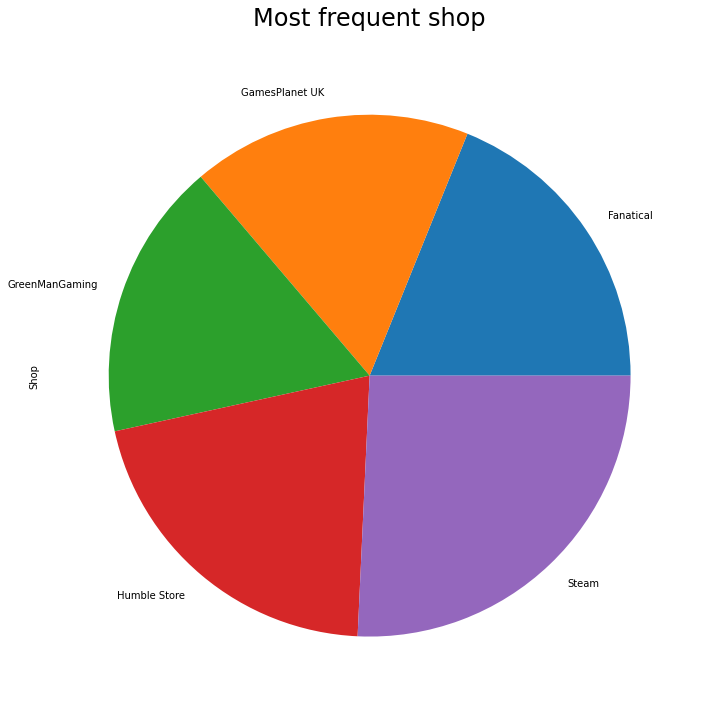

In [246]:
plot_pie_remove_duplicates(
    df=cleaned_games_with_history,
    key='shop',
    plot_style={
        'title':'Most frequent shop',
        'y_label':"Shop"
    }
)

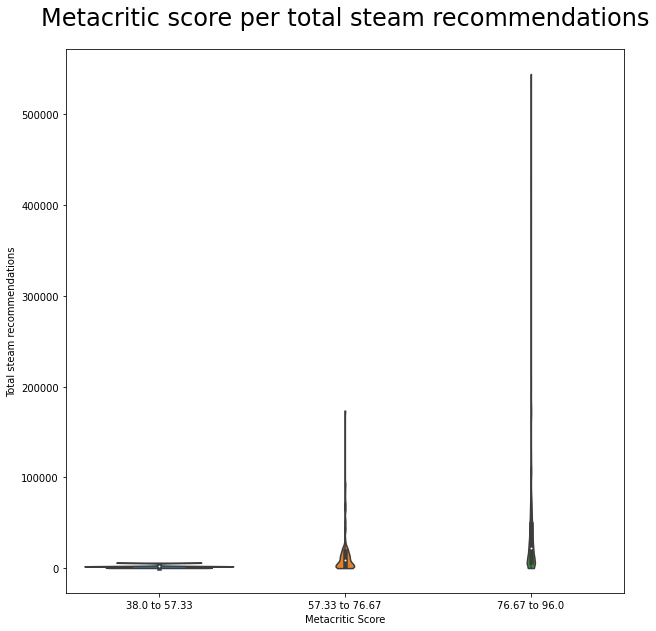

In [247]:
plot_group_by_x_percentage(
    cleaned_games_with_history,
    'metacritic_score',
    'total_steam_recommendations',
    {
        'x_label':'Metacritic Score',
        'title':'Metacritic score per total steam recommendations',
        'y_label':'Total steam recommendations'
    }
)

<a id="4.3"></a>
<h3>4.3. Regular Price / Number of dlcs available</h3>
<a href="#table-of-contents">^back to top^</a>
<h4>This graph represents the connection between the regular price and the number of dlcs the game has.</h4>
<h4><i>Outcome: </i>We can see clearly that to put it simply, the cheaper the game was more dlcs it has</h4>

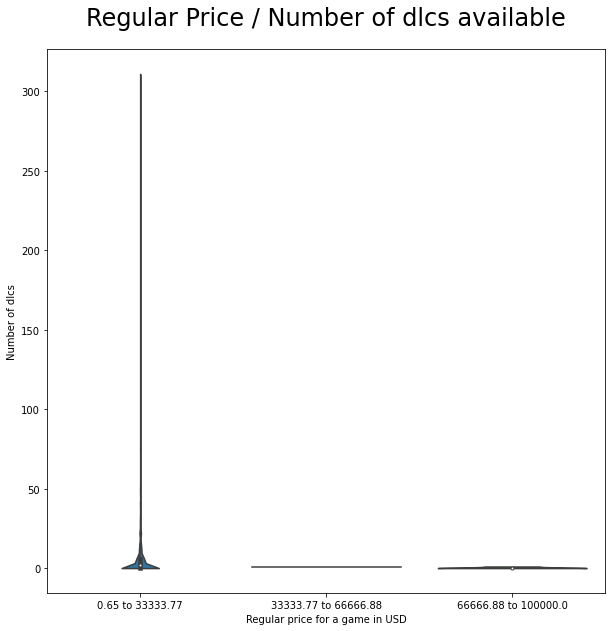

In [248]:
plot_group_by_x(
    cleaned_games_with_history,
    'regular_price',
    'num_of_dlc',
    {
        'title':'Regular Price / Number of dlcs available',
        'x_label':'Regular price for a game in USD',
        'y_label':'Number of dlcs',
    }
)

<a id="4.4"></a>
<h3>4.4. Metacric score / Regular Price</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that the regular price is often lined to the metacritic score the game got.</p>

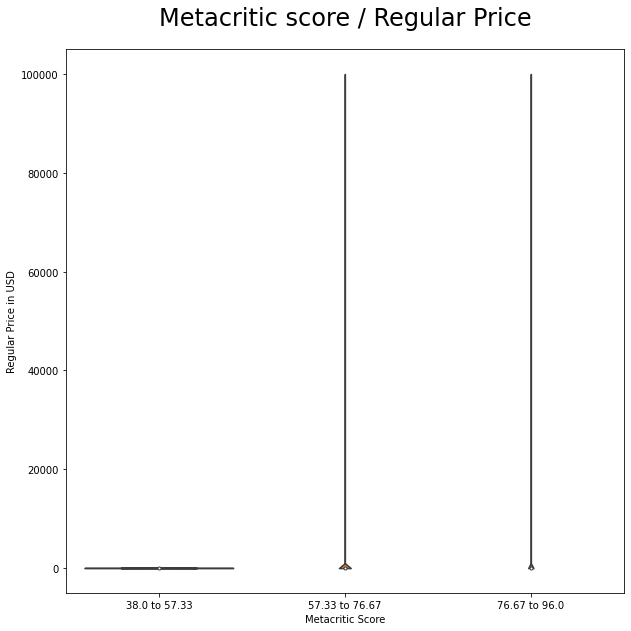

In [250]:
plot_group_by_x_percentage(
    cleaned_games_with_history,
    'metacritic_score',
    'regular_price',
    {
        'title':'Metacritic score / Regular Price',
        'y_label':'Regular Price in USD',
        'x_label':'Metacritic Score',
    }
)

<a id="4.5"></a>
<h3>4.5. Game Price / Publisher</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that the most expensive publishers are big companys</p>

D:\Studies\Introduction-To-Data-Science\DataScienceFinalProject\.venv\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


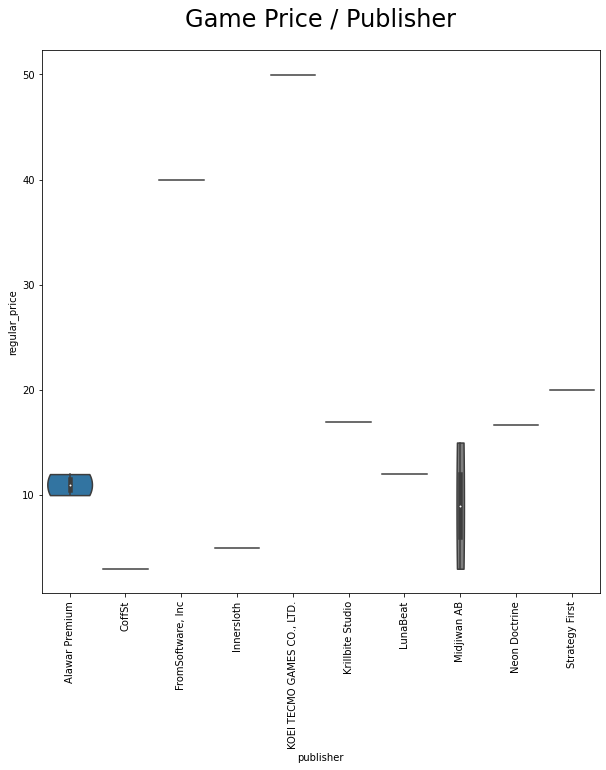

In [251]:
plot_price_per_10_random_publishers(cleaned_games_with_history)

<a id="4.6"></a>
<h3>4.6. Regular price / Genre</h3>
<a href="#table-of-contents">^back to top^</a>
<p>
We can see that the genres Action, adventure and RPG average cost is higher <br/>
probably because the development takes far more time for these genres
</p>

count      9789
unique        2
top       False
freq       7347
Name: genre.Strategy, dtype: object


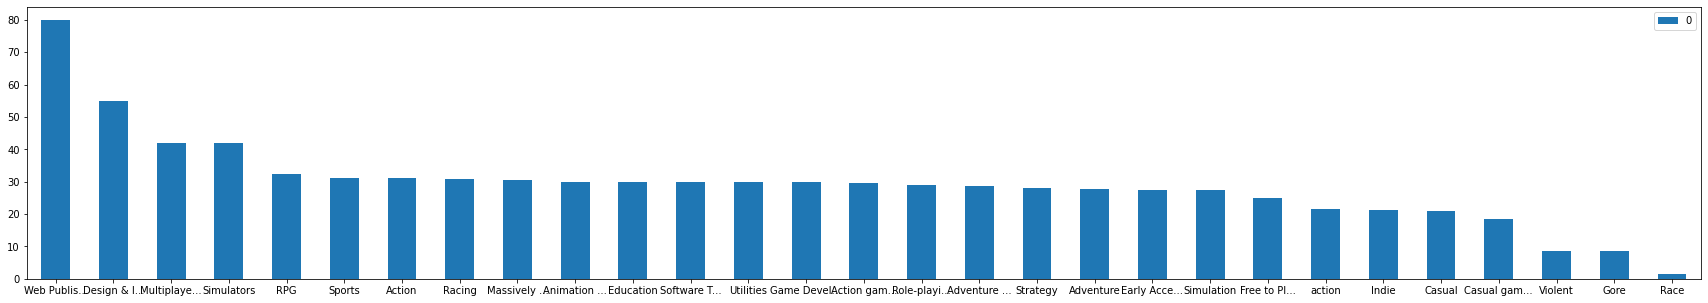

In [252]:
plot_regular_price_per_genre(cleaned_games_with_history)

<a id="4.7"></a>
<h3>4.7. Controller support Pie chart</h3>
<a href="#table-of-contents">^back to top^</a>

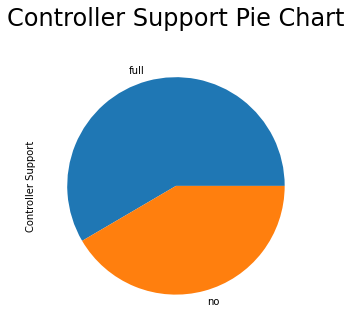

In [253]:
plot_pie_remove_duplicates(cleaned_games_with_history, 'controller_support', plot_style={
    'title':'Controller Support Pie Chart',
    'y_label':"Controller Support"
})

<a id="4.8"></a>
<h3>4.8. Platforms supported Pie chart</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that probably platforms that support Mac also support Linux, and all games support Windows</p>

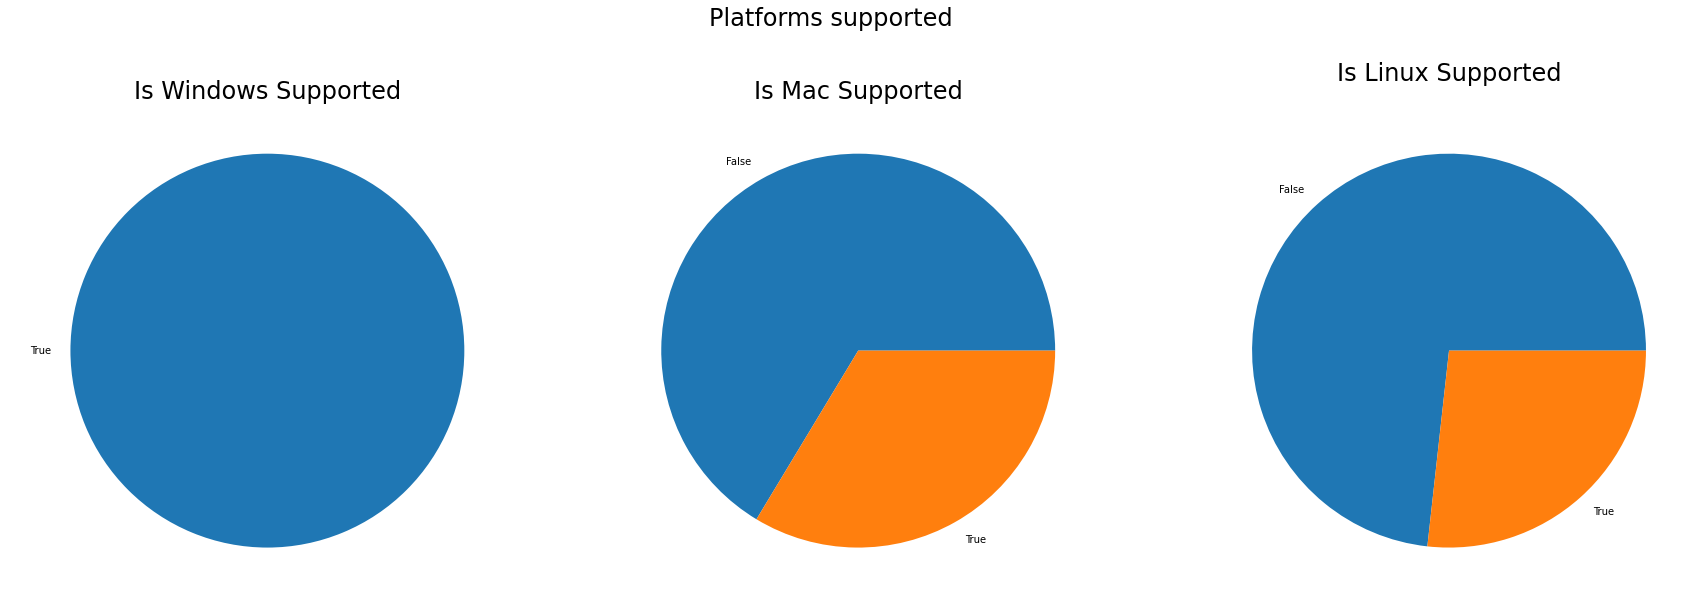

In [254]:
plot_game_support(cleaned_games_with_history)

<a id="4.9"></a>
<h3>4.9. Sales of 5 top games over time (the ones which have most history)</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that most games start giving discounts of more than 20% after the first year of release,<br/>
then reach 50% on the start of the next year and on the third and fourth reach a max of 80% discount</p>

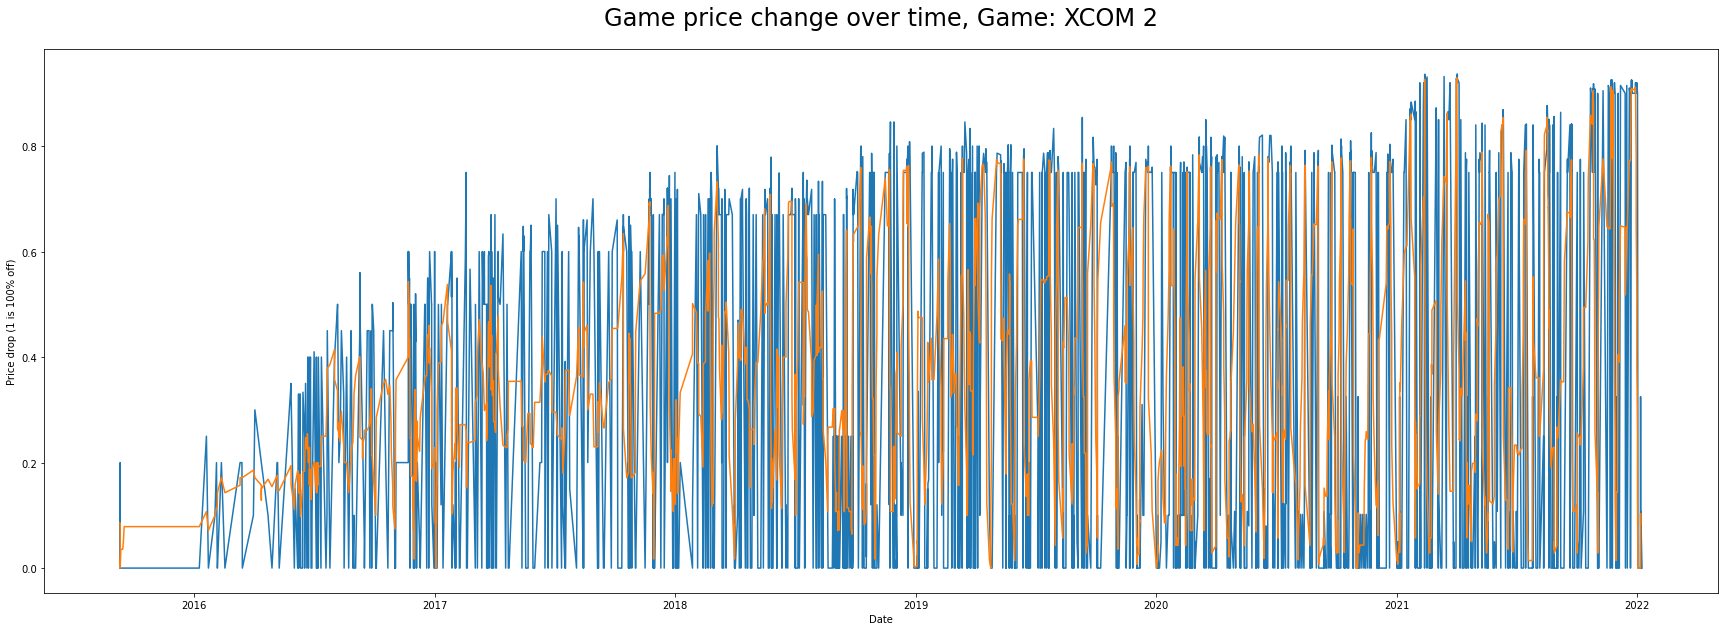

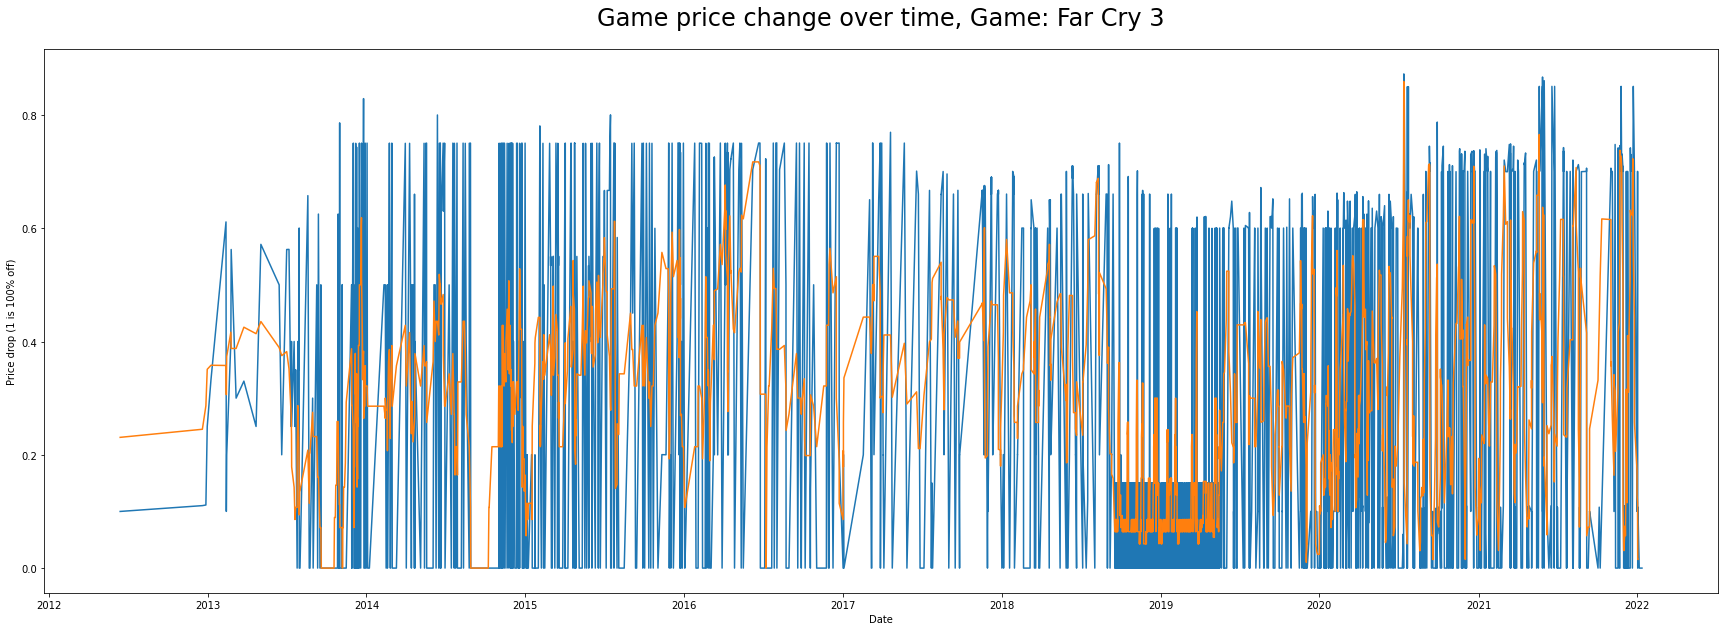

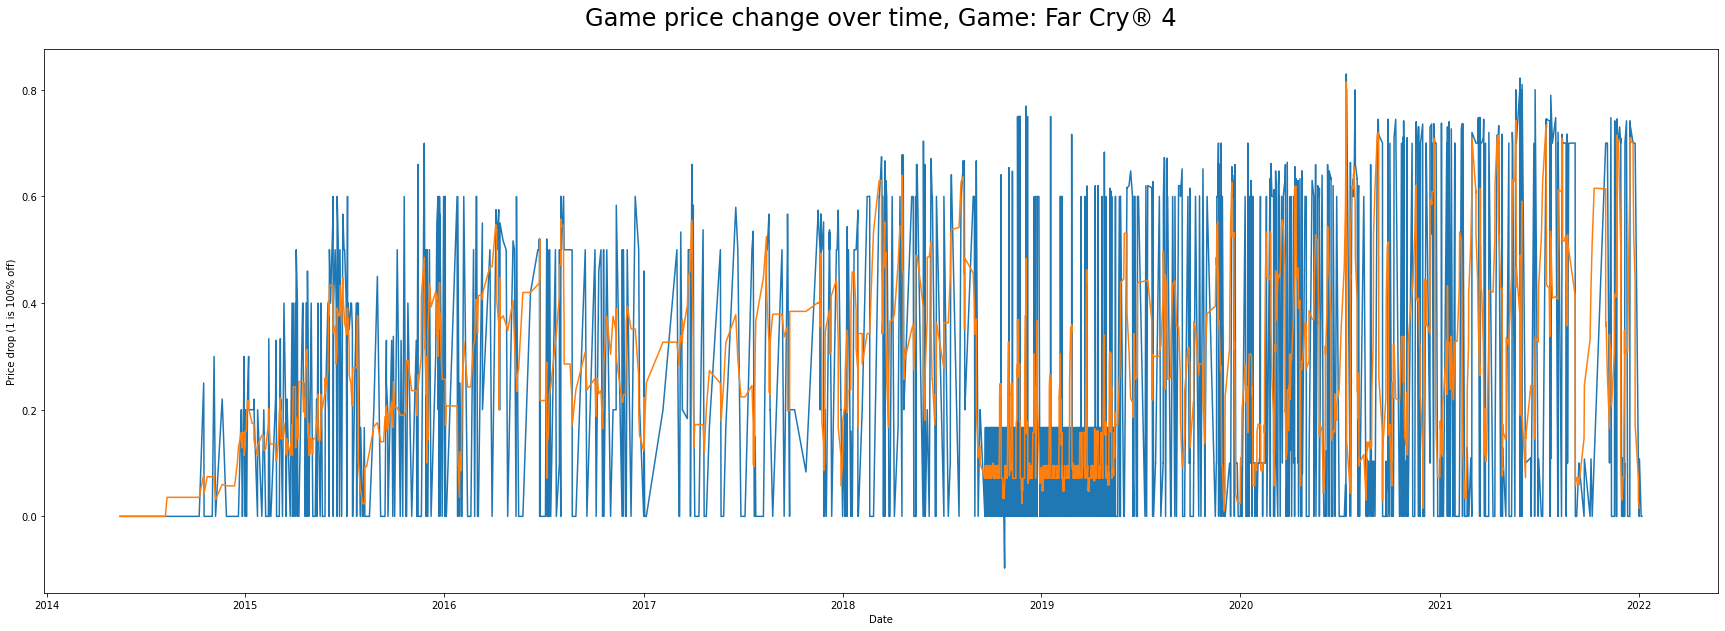

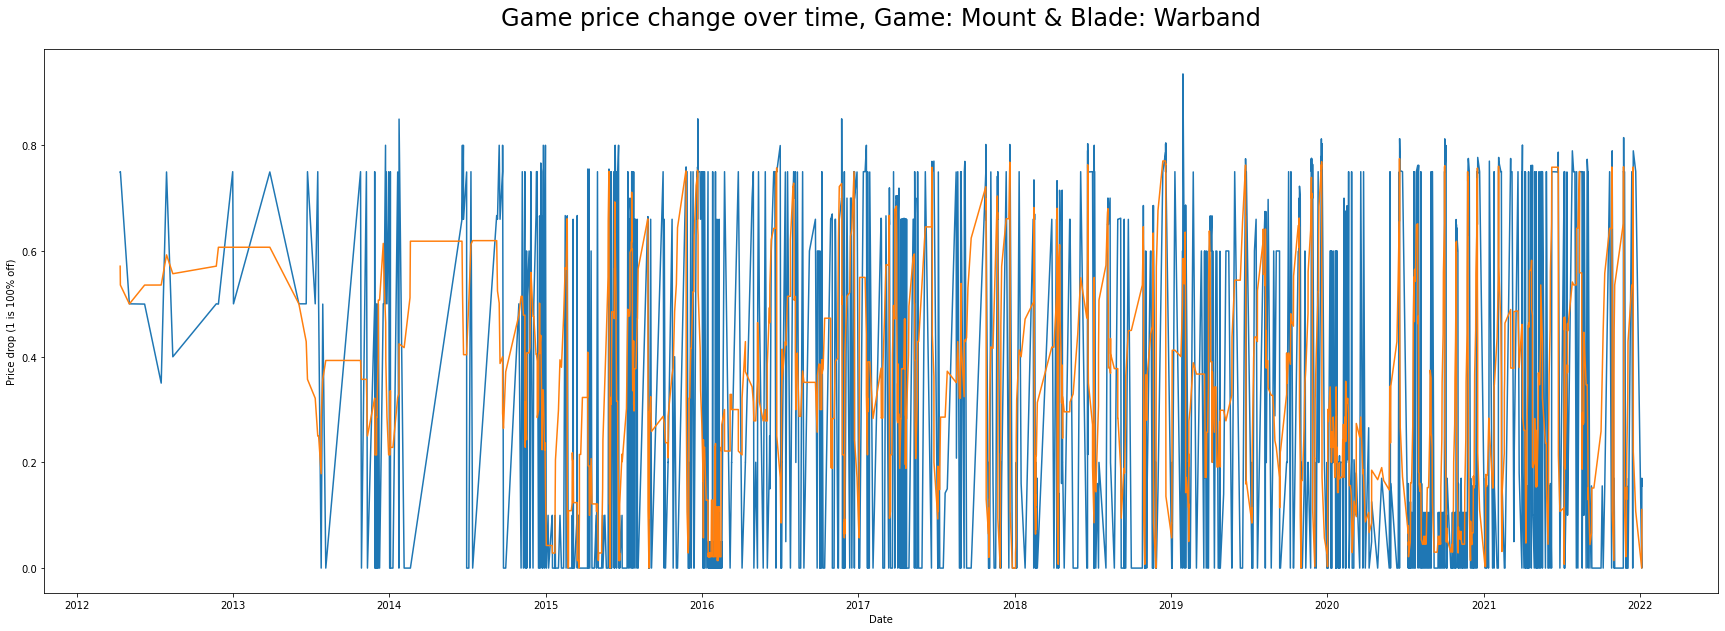

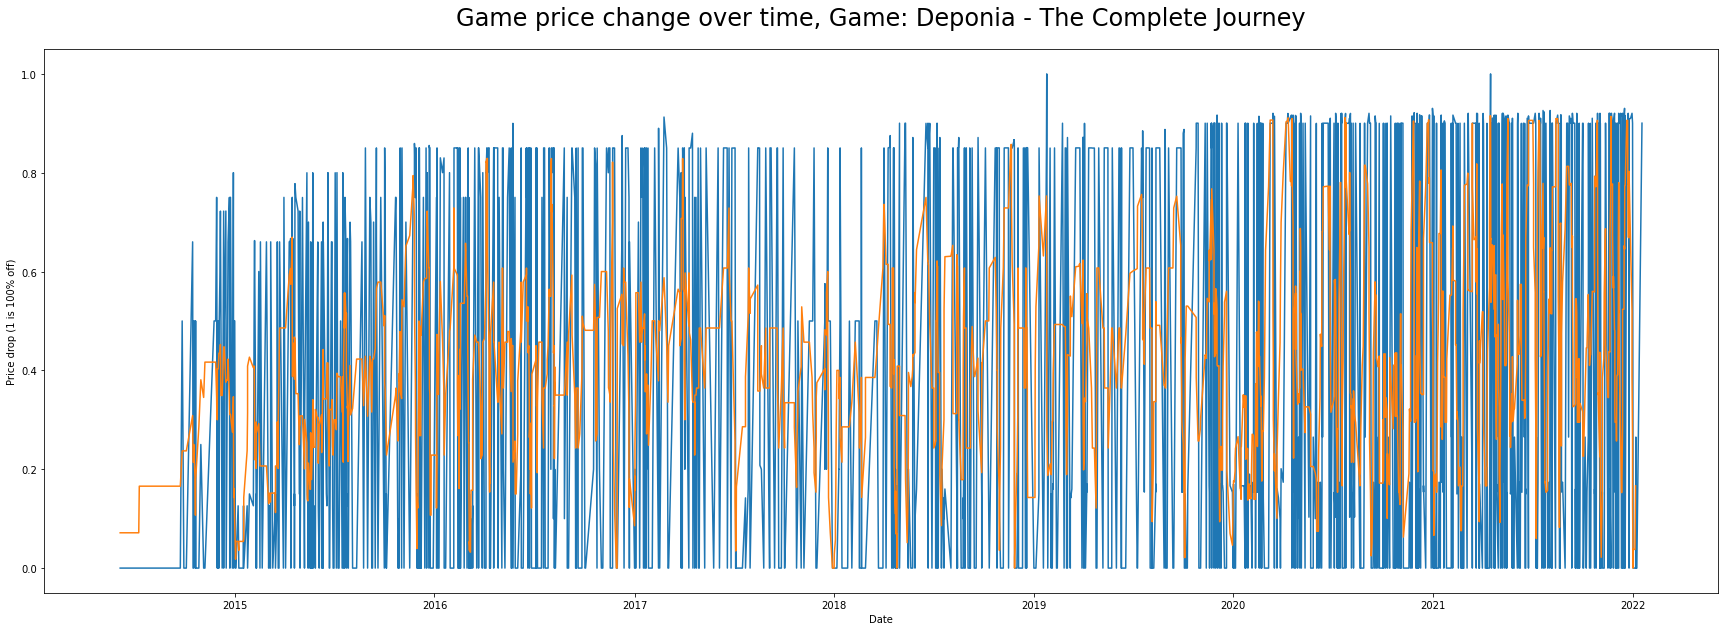

<Figure size 2160x720 with 0 Axes>

In [255]:
games = get_n_games_row_count(cleaned_games_with_history, 5)
for (steam_id, game_title, _) in games:
    plot_game_price_history(cleaned_games_with_history, steam_id)


<a id="4.10"></a>
<h3>4.10. Price drop of the top over a year with holidays in mind</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We also see that on holidays the prices of games drop substantially,<br/>
but like in the last Plot after the second year, the time of year is not a factor anymore
</p>

  0%|          | 0/1 [00:00<?, ?it/s]

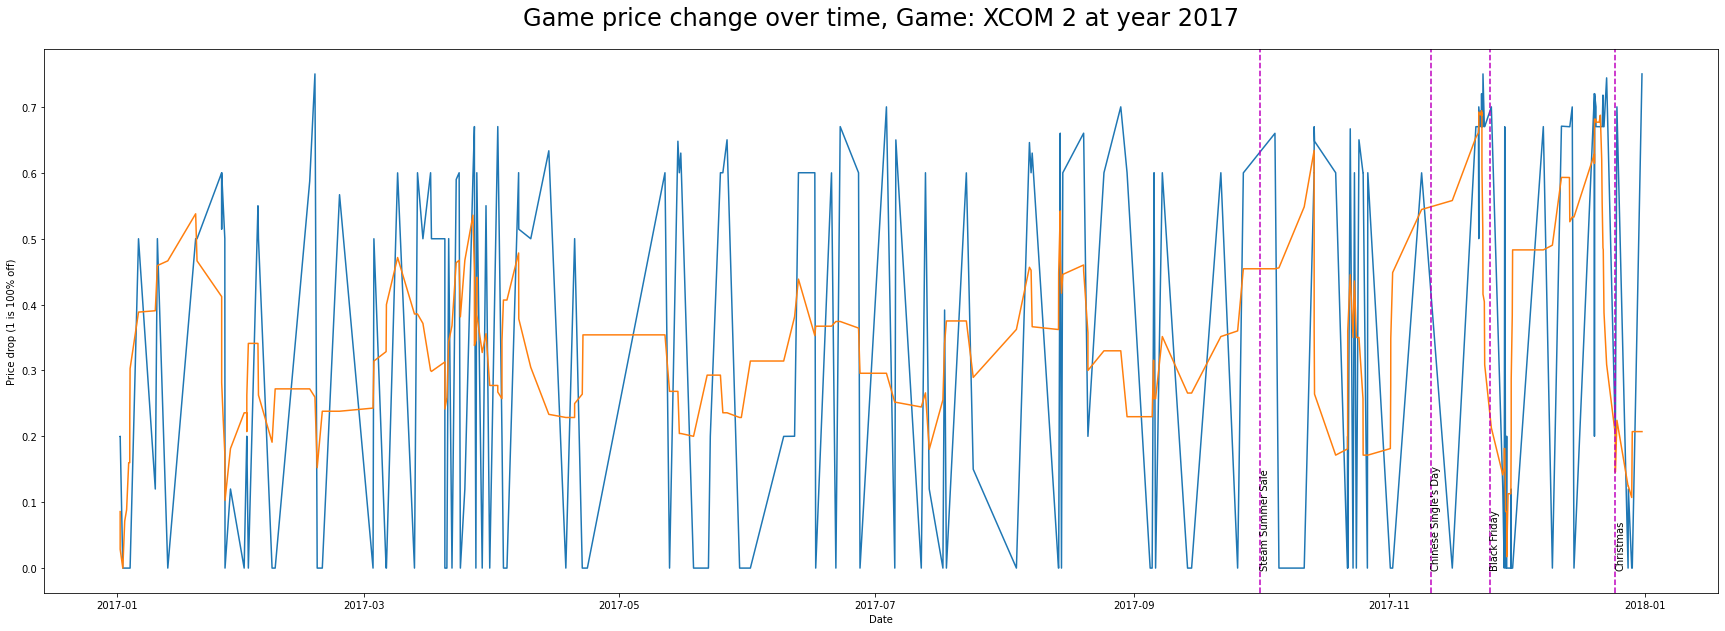

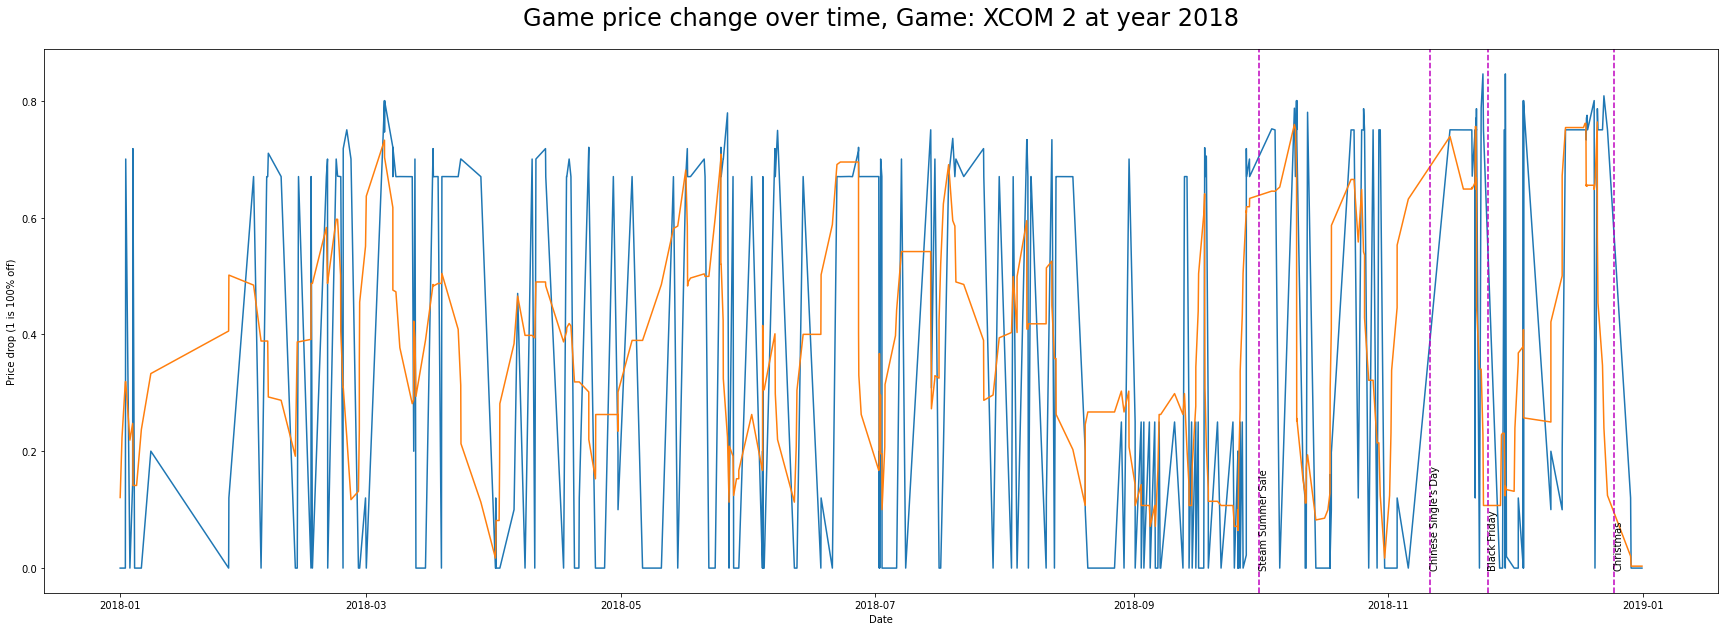

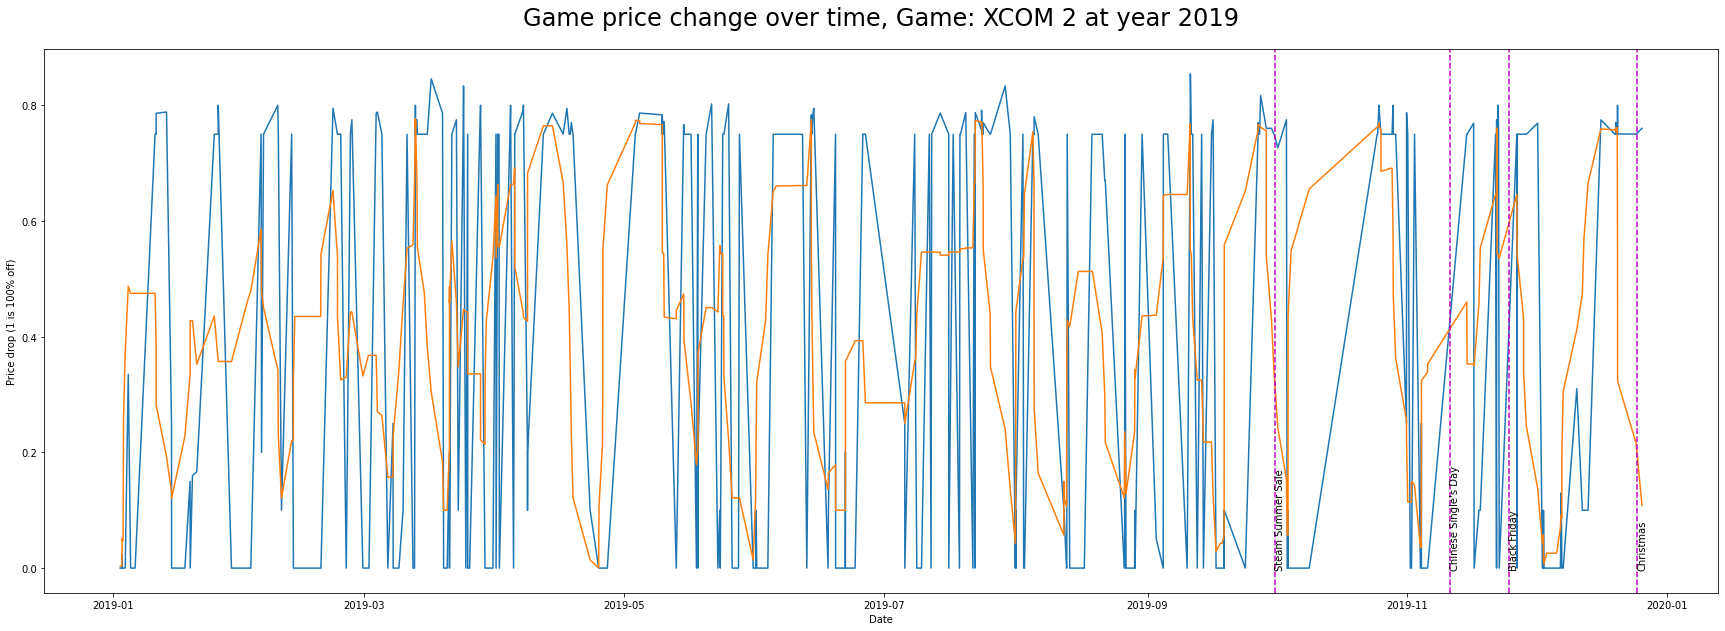

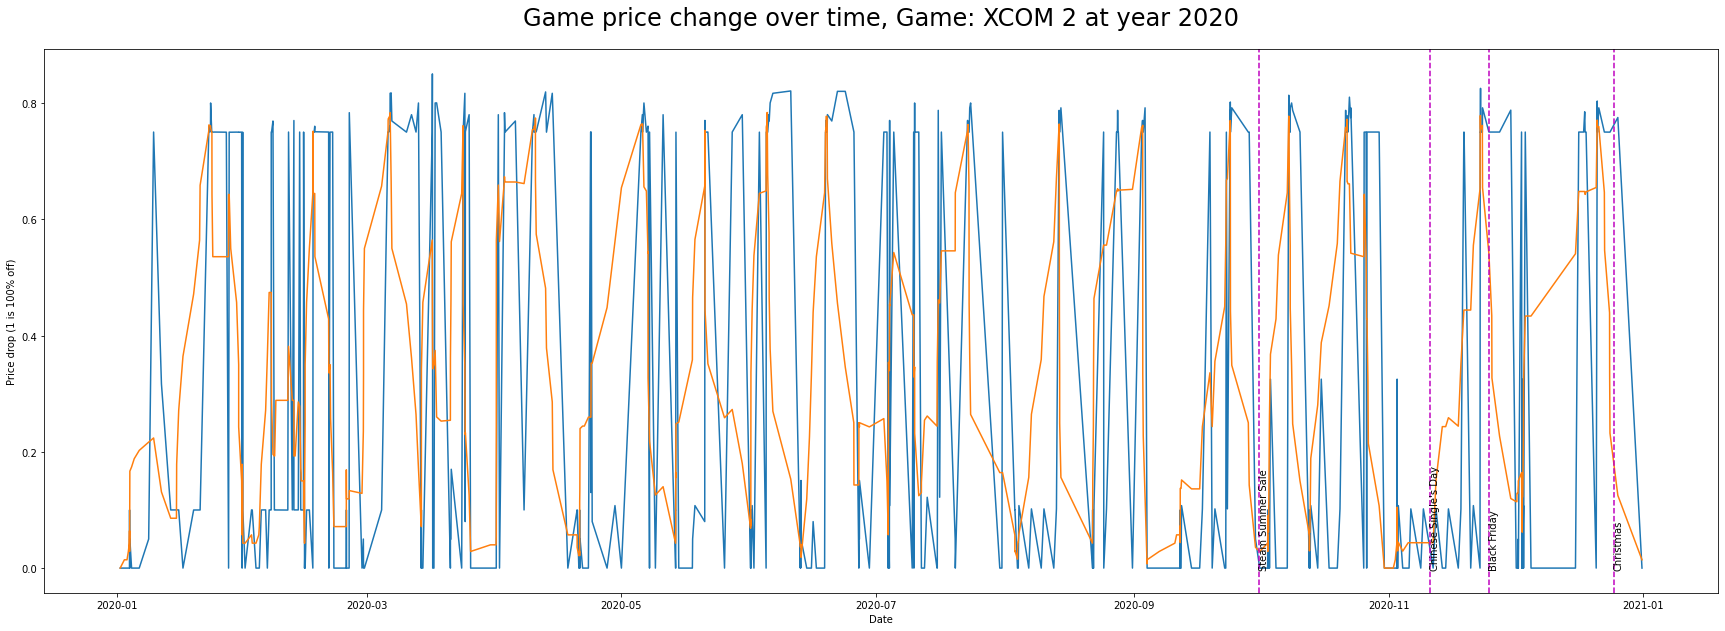

<Figure size 2160x720 with 0 Axes>

In [256]:
games = get_n_games_row_count(cleaned_games_with_history, 1)
years = list(map(lambda i: i+2017, range(0, 4)))
for (steam_id, game_title, _) in tqdm(games):
    for year in years:
        plot_game_price_history(cleaned_games_with_history, steam_id, year=year, show_holidays=True)

<a id="5"></a>
<h2>5. Advanced Analysis and Machine Learning</h2>
<a href="#table-of-contents">^back to top^</a>

In [9]:
advanced_analysis_and_ml = load_df('games_after_cleaning_columns_with_only_one_unique_value.csv')
advanced_analysis_and_ml

steamId                          title  \
0        359840                  Shift Happens   
1        359840                  Shift Happens   
2        359840                  Shift Happens   
3        359840                  Shift Happens   
4        359840                  Shift Happens   
...         ...                            ...   
393450   402880  Age of Barbarian Extended Cut   
393451   402880  Age of Barbarian Extended Cut   
393452   402880  Age of Barbarian Extended Cut   
393453   402880  Age of Barbarian Extended Cut   
393454   402880  Age of Barbarian Extended Cut   

                                             history_link required_age  \
0       https://isthereanydeal.com/game/shifthappens/h...            0   
1       https://isthereanydeal.com/game/shifthappens/h...            0   
2       https://isthereanydeal.com/game/shifthappens/h...            0   
3       https://isthereanydeal.com/game/shifthappens/h...            0   
4       https://isthereanydeal.com/game/shifthappens/h...            0   
...                                                   ...          ...   
393450  https://isthereanydeal.com/game/ageofbarbarian...           18   
393451  https://isthereanydeal.com/game/ageofbarbarian...           18   
393452  https://isthereanydeal.com/game/ageofbarbarian...           18   
393453  https://isthereanydeal.com/game/ageofbarbarian...           18   
393454  https://isthereanydeal.com/game/ageofbarbarian...           18   

        is_free controller_support release_date  category.Single-player  \
0         False               full   2017-02-22                    True   
1         False               full   2017-02-22                    True   
2         False               full   2017-02-22                    True   
3         False               full   2017-02-22                    True   
4         False               full   2017-02-22                    True   
...         ...                ...          ...                     ...   
393450    False               full   2016-06-03                    True   
393451    False               full   2016-06-03                    True   
393452    False               full   2016-06-03                    True   
393453    False               full   2016-06-03                    True   
393454    False               full   2016-06-03                    True   

        category.Multi-player  category.PvP  ...  windows_supported  \
0                        True          True  ...                  1   
1                        True          True  ...                  1   
2                        True          True  ...                  1   
3                        True          True  ...                  1   
4                        True          True  ...                  1   
...                       ...           ...  ...                ...   
393450                  False         False  ...                  1   
393451                  False         False  ...                  1   
393452                  False         False  ...                  1   
393453                  False         False  ...                  1   
393454                  False         False  ...                  1   

        mac_supported  linux_supported  total_steam_recommendations  \
0                   0                0                       1037.0   
1                   0                0                       1037.0   
2                   0                0                       1037.0   
3                   0                0                       1037.0   
4                   0                0                       1037.0   
...               ...              ...                          ...   
393450              0                0                        656.0   
393451              0                0                        656.0   
393452              0                0                        656.0   
393453              0                0                

In [24]:
advanced_analysis_and_ml_steam_only = advanced_analysis_and_ml[advanced_analysis_and_ml['shop']=='Steam']
save_df(advanced_analysis_and_ml_steam_only, "advanced_analysis_and_ml_steam_only.csv")

In [12]:
advanced_analysis_and_ml_steam_only = load_df("advanced_analysis_and_ml_steam_only.csv")
advanced_analysis_and_ml_steam_only

steamId                          title  \
0       359840                  Shift Happens   
1       359840                  Shift Happens   
2       359840                  Shift Happens   
3       359840                  Shift Happens   
4       359840                  Shift Happens   
...        ...                            ...   
40172   402880  Age of Barbarian Extended Cut   
40173   402880  Age of Barbarian Extended Cut   
40174   402880  Age of Barbarian Extended Cut   
40175   402880  Age of Barbarian Extended Cut   
40176   402880  Age of Barbarian Extended Cut   

                                            history_link required_age  \
0      https://isthereanydeal.com/game/shifthappens/h...            0   
1      https://isthereanydeal.com/game/shifthappens/h...            0   
2      https://isthereanydeal.com/game/shifthappens/h...            0   
3      https://isthereanydeal.com/game/shifthappens/h...            0   
4      https://isthereanydeal.com/game/shifthappens/h...            0   
...                                                  ...          ...   
40172  https://isthereanydeal.com/game/ageofbarbarian...           18   
40173  https://isthereanydeal.com/game/ageofbarbarian...           18   
40174  https://isthereanydeal.com/game/ageofbarbarian...           18   
40175  https://isthereanydeal.com/game/ageofbarbarian...           18   
40176  https://isthereanydeal.com/game/ageofbarbarian...           18   

       is_free controller_support release_date  category.Single-player  \
0        False               full   2017-02-22                    True   
1        False               full   2017-02-22                    True   
2        False               full   2017-02-22                    True   
3        False               full   2017-02-22                    True   
4        False               full   2017-02-22                    True   
...        ...                ...          ...                     ...   
40172    False               full   2016-06-03                    True   
40173    False               full   2016-06-03                    True   
40174    False               full   2016-06-03                    True   
40175    False               full   2016-06-03                    True   
40176    False               full   2016-06-03                    True   

       category.Multi-player  category.PvP  ...  windows_supported  \
0                       True          True  ...                  1   
1                       True          True  ...                  1   
2                       True          True  ...                  1   
3                       True          True  ...                  1   
4                       True          True  ...                  1   
...                      ...           ...  ...                ...   
40172                  False         False  ...                  1   
40173                  False         False  ...                  1   
40174                  False         False  ...                  1   
40175                  False         False  ...                  1   
40176                  False         False  ...                  1   

       mac_supported  linux_supported  total_steam_recommendations  \
0                  0                0                       1037.0   
1                  0                0                       1037.0   
2                  0                0                       1037.0   
3                  0                0                       1037.0   
4                  0                0                       1037.0   
...              ...              ...                          ...   
40172              0                0                        656.0   
40173              0                0                        656.0   
40174              0                0                        656.0   
40175              0                0                        656.0   
40176              0                0    

In [26]:
def save_model(t: str, name: str, model):
    f = open(f'./results/models/{t}/{name}.pickle', "wb")
    pickle.dump(model, f)
    f.close()

<a id="5.1"></a>
<h3>5.1. Feature correlation</h3>
<a href="#table-of-contents">^back to top^</a>

C:\Users\elad1\AppData\Local\Temp/ipykernel_20804/1347654822.py:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


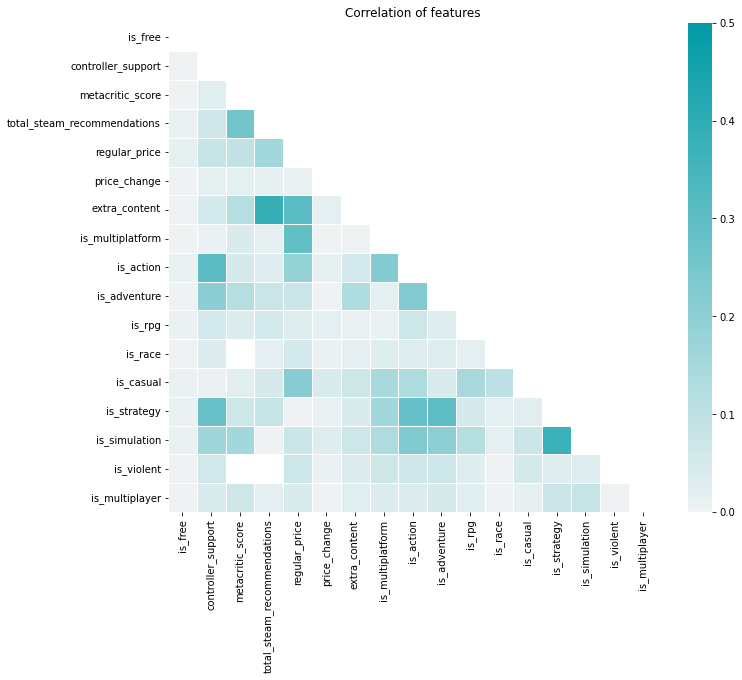

In [27]:
def plot_correlation(ndf: DataFrame):
    df = ndf.copy()
    df = df.loc[:, ~df.columns.str.startswith('supported_language')]
    df = df.loc[:, ~df.columns.str.startswith('publisher')]
    df = df.loc[:, ~df.columns.str.startswith('developer')]
    # df = df.loc[:, ~df.columns.str.startswith('category')]
    # df.drop(['title', 'windows_supported', 'history_link', 'steamId', 'num_of_dlc', 'number_of_demos', 'num_of_game_videos', 'num_of_packages_game_is_in'], axis=1, inplace=True)

    # TEMP

    df['extra_content'] = df['num_of_dlc'] + df['number_of_demos'] + df['num_of_game_videos'] + df['num_of_packages_game_is_in']

    df['is_multiplatform'] = df['linux_supported'] | df['mac_supported']

    df.drop(['title', 'price_now', 'windows_supported', 'linux_supported', 'mac_supported', 'history_link', 'fullgame', 'steamId', 'player_count', 'num_of_dlc', 'number_of_demos', 'num_of_game_videos', 'num_of_packages_game_is_in'], axis=1, inplace=True)

    df['controller_support'] = df['controller_support'].apply(lambda row: 1 if row == 'full' else 0)
    df['required_age'] = df['required_age'].astype("category")
    df = df.loc[:, ~df.columns.str.startswith('category')]

    df['is_action'] = df['genre.Action'] + df['genre.action'] + df['genre.Action games']
    df['is_adventure'] = df['genre.Adventure'] + df['genre.Adventure games']
    df['is_rpg'] = df['genre.RPG']
    df['is_race'] = df['genre.Race']
    df['is_casual'] = df['genre.Casual'] + df['genre.Casual games']
    df['is_strategy'] = df['genre.Strategy']
    df['is_simulation'] = df['genre.Simulation'] + df['genre.Simulators']
    df['is_violent'] = df['genre.Violent'] + df['genre.Gore']
    df['is_multiplayer'] = df['genre.Multiplayer games']
    df = df.loc[:, ~df.columns.str.startswith('genre.')]

    # END TEMP
    corr = df.corr().abs()

    # upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    # to_drop = [column for column in upper.columns if any(upper[column] > 0.2)] # dont remove all
    # df.drop(to_drop, axis=1, inplace=True)

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(0, 200, s=160, l=55, n=9, as_cmap=True)

    sns.heatmap(corr, cmap=cmap, vmax=.5, vmin=0, center=0, mask=mask, square=True, linewidths=1)
    plt.title('Correlation of features')

plot_correlation(advanced_analysis_and_ml_steam_only)

<a id="5.2"></a>
<h3>5.2. Linear Regression Model</h3>
<a href="#table-of-contents">^back to top^</a>

In [28]:
def load_dataframe(ndf: DataFrame):
    df = ndf.copy()
    df['extra_content'] = df['num_of_dlc'] + df['number_of_demos'] + df['num_of_game_videos'] + df['num_of_packages_game_is_in']

    df.drop(['title', 'price_now', 'windows_supported', 'history_link', 'fullgame', 'steamId', 'player_count', 'num_of_dlc', 'number_of_demos', 'num_of_game_videos', 'num_of_packages_game_is_in'], axis=1, inplace=True)

    df['controller_support'] = df['controller_support'].apply(lambda row: 1 if row == 'full' else 0)
    df['required_age'] = df['required_age'].astype("category")
    df = df.loc[:, ~df.columns.str.startswith('category')]

    df['is_action'] = df['genre.Action'] + df['genre.action'] + df['genre.Action games']
    df['is_adventure'] = df['genre.Adventure'] + df['genre.Adventure games']
    df['is_rpg'] = df['genre.RPG']
    df['is_race'] = df['genre.Race']
    df['is_casual'] = df['genre.Casual'] + df['genre.Casual games']
    df['is_strategy'] = df['genre.Strategy']
    df['is_simulation'] = df['genre.Simulation'] + df['genre.Simulators']
    df['is_violent'] = df['genre.Violent'] + df['genre.Gore']
    df = df.loc[:, ~df.columns.str.startswith('genre.')]

    avg_metacritic_score = df['metacritic_score'].mean()
    df['metacritic_score'].fillna(avg_metacritic_score, inplace=True)

    df['is_good_meta_score'] = df['metacritic_score'] > 6
    df['is_bad_meta_score'] = df['metacritic_score'] < 6

    df['total_steam_recommendations'].fillna(0, inplace=True)
    categorical_data = df.select_dtypes(['category'])

    for category_col in categorical_data:
        df.append(pd.get_dummies(data=df[category_col], drop_first=True))
        df.drop(category_col, axis=1, inplace=True)

    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_date'] = df['release_date'].values.astype(np.int64) // 10 ** 9

    if df['metacritic_score'].iloc[0] is None or np.isnan(df['metacritic_score'].iloc[0]):
        df.drop(['metacritic_score'], axis=1, inplace=True)

    df['record_date'] = pd.to_datetime(df['record_date'])
    df['record_date'] = df['record_date'].values.astype(np.int64) // 10 ** 9

    df['developer'] = df['developer'].astype('category').cat.codes
    df['publisher'] = df['publisher'].astype('category').cat.codes
    df['shop'] = df['shop'].astype('category').cat.codes
    df.set_index(pd.DatetimeIndex(df['record_date']*10**9), inplace=True, drop=True)
    return df

def split_propreties_test(ndf: DataFrame, target_column):
    df = load_dataframe(ndf)
    Y = df.pop(target_column)
    return df, Y


In [32]:
def train_linear_regression_model(X_train, y_train):
    model = linear_model.LinearRegression()
    return model.fit(X_train, y_train)

def train_random_forest_model(X_train, y_train):
    clf = RandomForestRegressor(n_estimators=150)
    return clf.fit(X_train,y_train)

def train_xgboost(X_train, y_train):
    clf = xgb.XGBRegressor(verbosity=0)
    return clf.fit(X_train,y_train)

In [39]:
def predict_evaluate_performance(model, X_test, y_test, **kargs):
    predicted = model.predict(X_test)
    return {'predicted': predicted, 'score': r2_score(y_test, predicted)}

def create_model(ndf, train_model_fn) -> dict:
    X, y = split_propreties_test(ndf, 'price_change')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)
    return {'model': train_model_fn(X_train=X_train, y_train=y_train), 'X_test': X_test, 'y_test': y_test}

def create_train_model(d: dict, train_model_fn):
    removed_games = []
    print("Creating model for entire game df")
    d['as_is'] = create_model(advanced_analysis_and_ml, train_model_fn)
    print("Creating model for each game")
    for game in tqdm(advanced_analysis_and_ml.steamId.unique(), total=len(advanced_analysis_and_ml.steamId.unique())):
        game_df: DataFrame = advanced_analysis_and_ml[advanced_analysis_and_ml.steamId==game]
        if len(game_df.index) <= 5:
            removed_games.append(game)
            continue
        d[game] = create_model(game_df, train_model_fn)
    return d, removed_games

def scatter_plot_models(price_change_predictions_dict: dict):
    name_and_performance = DataFrame(map(lambda x: (x[0], x[1]['performance']['score']), price_change_predictions_dict.items()))
    failed_models = name_and_performance[name_and_performance[1]<=0]
    good_models = name_and_performance[name_and_performance[1]>0]
    print(len(good_models.index), )
    plot = sns.stripplot(x=0, y=1, data=good_models)
    set_plot_styling(plot, {
        "title": "Performance ignoring failed models",
        "sq_size": 12,
        "y_label": "R2 Score",
        "x_label": 'Model',
        "remove_x_labels": True,
        'label_size': 20
    })

    print("Failed models:", failed_models)

def assert_models_performance(m):
    m['as_is']['performance'] = predict_evaluate_performance(**m['as_is'])

    for game in tqdm(advanced_analysis_and_ml.steamId.unique()):
        if game in removed_games:
            continue
        m[game]['performance'] = predict_evaluate_performance(**m[game])

def save_models(t: str, all_models_dict):
    for key, val in all_models_dict[t].items():
        model = val['model']
        save_model(t, key, model)

In [34]:
models = dict()
models['linear_regression'] = dict()
models['linear_regression'], removed_games = create_train_model(models['linear_regression'], train_linear_regression_model)


  0%|          | 0/711 [00:00<?, ?it/s]

In [35]:
assert_models_performance(models['linear_regression'])

  0%|          | 0/711 [00:00<?, ?it/s]

In [36]:
save_models('linear_regression', models)

130
Failed models:            0          1
1     359840 -39.847836
2    1174180  -0.003181
3    1091500  -1.549635
4     442070  -0.026645
5      21660  -0.541458
..       ...        ...
693   699170  -1.228684
694  1004490  -1.419224
695   305380  -0.062841
697  1421760  -0.044482
698   402880  -0.073749

[569 rows x 2 columns]


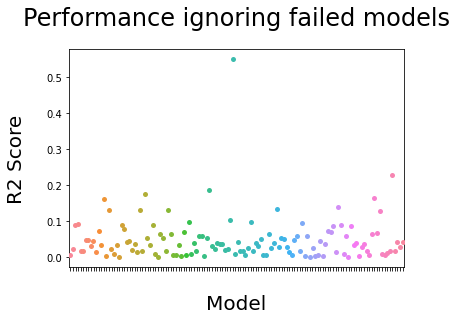

In [37]:
scatter_plot_models(models['linear_regression'])

In [40]:
models['random_forest'] = dict()
models['random_forest'], removed_games = create_train_model(models['random_forest'], train_random_forest_model)

Creating model for entire game df
Creating model for each game


  0%|          | 0/711 [00:00<?, ?it/s]

In [41]:
save_models('random_forest', models)

  0%|          | 0/711 [00:00<?, ?it/s]

21
Failed models:            0         1
1     359840 -0.320072
2    1174180 -0.032416
3    1091500 -2.953591
4     442070 -0.163361
7     469820 -0.153352
..       ...       ...
694  1004490 -0.944732
695   305380 -0.164597
696   696530 -0.184321
697  1421760 -1.312713
698   402880 -0.039277

[678 rows x 2 columns]


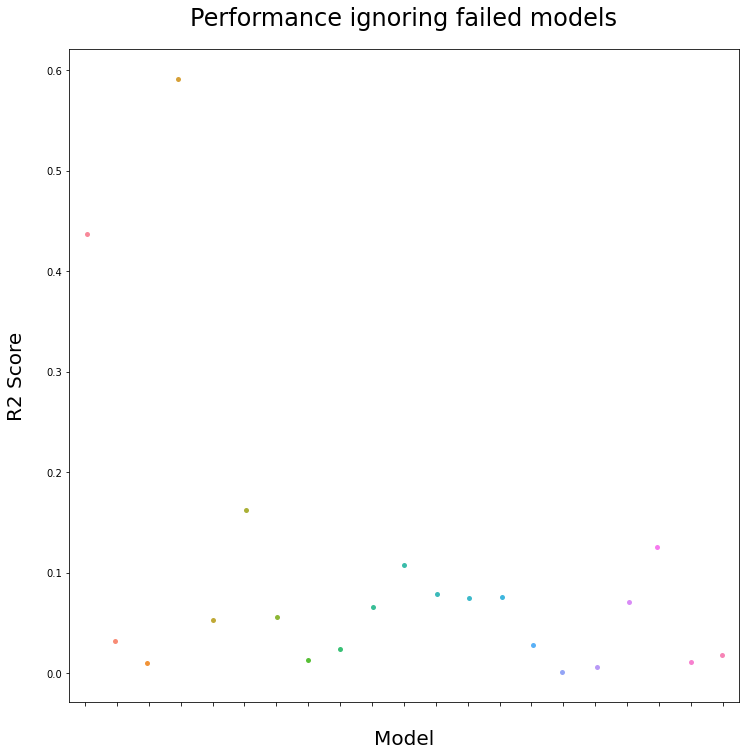

In [42]:
assert_models_performance(models['random_forest'])
scatter_plot_models(models['random_forest'])

In [43]:
models['xgboost'] = dict()
models['xgboost'], removed_games = create_train_model(models['xgboost'], train_xgboost)

Creating model for entire game df
Creating model for each game


  0%|          | 0/711 [00:00<?, ?it/s]

In [44]:
save_models('xgboost', models)

  0%|          | 0/711 [00:00<?, ?it/s]

10
Failed models:            0         1
1     359840 -0.494933
2    1174180 -0.585777
3    1091500 -6.670066
4     442070 -0.094166
5      21660 -0.177135
..       ...       ...
694  1004490 -2.295307
695   305380 -0.442334
696   696530 -0.460151
697  1421760 -4.396223
698   402880 -0.768322

[689 rows x 2 columns]


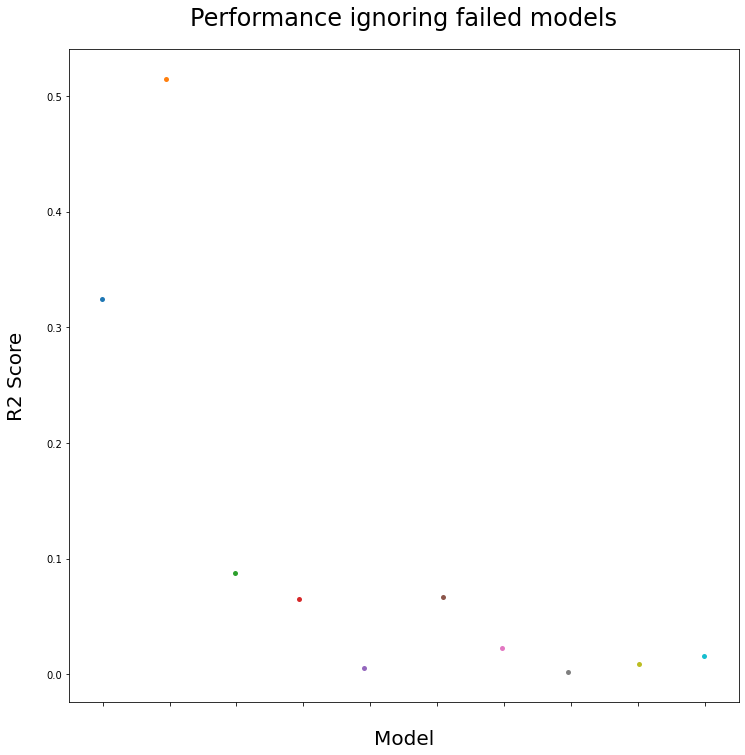

In [45]:
assert_models_performance(models['xgboost'])
scatter_plot_models(models['xgboost'])

<a id="6"></a>
<h2>Deep Learning</h2>
<a href="#table-of-contents">^back to top^</a>
<br/>
<a id="6.1"></a>
<h3>Time Series Forecasting With LSTM</h3>

In [46]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflowjs as tfjs


In [55]:
def create_lstm_model(ndf):
    df = load_dataframe(ndf)
    train = df[df.index < '2020-01-01 00:00:01']
    test = df[df.index >= '2020-01-01 00:00:01']
    # scale data
    scaler = MinMaxScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)

    # define generator
    n_input = 20
    n_features = len(df.columns)
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input)

    # define model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(n_input, n_features)))
    model.add(LSTM(90, return_sequences=True))
    model.add(LSTM(80))

    model.add(Dense(1, activation='softmax'))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    return model, model.fit(generator,epochs=10)

In [48]:
lstm_model, lstm_fit_history = create_lstm_model(advanced_analysis_and_ml)

Epoch 1/10
1207/1207 [==============================] - 66s 49ms/step - loss: 0.6709
Epoch 2/10
1207/1207 [==============================] - 61s 50ms/step - loss: 0.6709
Epoch 3/10
1207/1207 [==============================] - 60s 50ms/step - loss: 0.6709
Epoch 4/10
1207/1207 [==============================] - 59s 49ms/step - loss: 0.6709
Epoch 5/10
1207/1207 [==============================] - 59s 49ms/step - loss: 0.6709
Epoch 6/10
1207/1207 [==============================] - 58s 48ms/step - loss: 0.6709
Epoch 7/10
1207/1207 [==============================] - 60s 49ms/step - loss: 0.6709
Epoch 8/10
1207/1207 [==============================] - 59s 49ms/step - loss: 0.6709
Epoch 9/10
1207/1207 [==============================] - 60s 50ms/step - loss: 0.6709
Epoch 10/10
1207/1207 [==============================] - 60s 50ms/step - loss: 0.6709


In [49]:

def plot_loss(history):
    loss_per_epoch = history.history['loss']
    plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

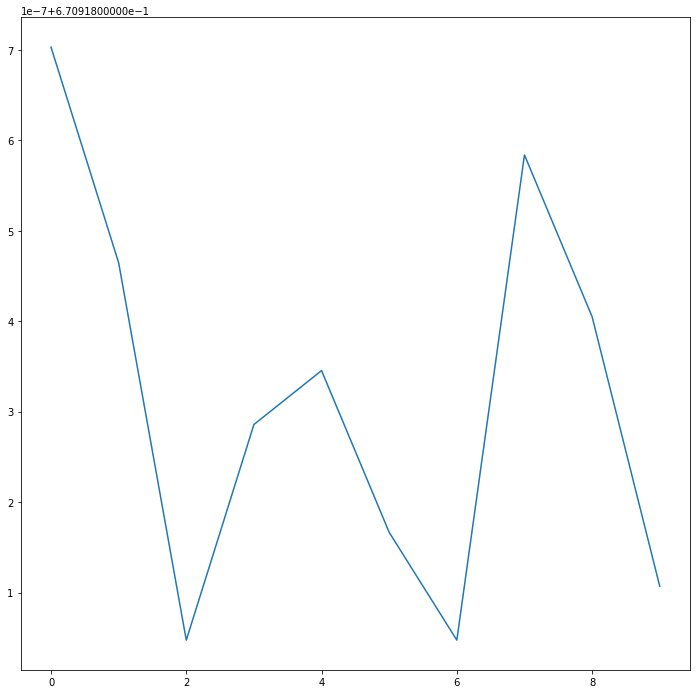

In [50]:
plot_loss(lstm_fit_history)

In [56]:
tfjs.converters.save_keras_model(lstm_model, "./results/models/deep-learning-model")

<a id="external_resources"></a>
<h2>External Resources Used</h2>
<a href="#table-of-contents">^back to top^</a>

* Scraped Sites
    * <a href="https://isthereanydeal.com/game/reddeadredemptionii/info/"><b>Is-There-Any-Deal website - For scraping cost history and more financial details</b></a>
    * <a href="https://store.steampowered.com/api/appdetails"><b>Steam API for Game Metadata - https://store.steampowered.com/api/appdetails?appids=1091500M</b></a>
    * <a href="https://steamcharts.com"><b>steamcharts.com - Site that tracked the amount of players over time of a game, used a request url i got from devtools network (because html just shows the response of the request)</b></a>
* General
    * <a href="https://pandas.pydata.org/docs/index.html"><b>Pandas Documentation</b></a>
    * <a href="https://seaborn.pydata.org"><b>Seaborn Documentation</b></a>
    * <a href="https://scikit-learn.org/stable/modules/classes.html"><b>Scikitlearn API</b></a>
    * <a href="http://jsonviewer.stack.hu/"><b>Viewing response json</b></a>
    * <a href="https://seaborn.pydata.org/">Seaborn API</a>
    * <a href="https://matplotlib.org/stable/">Matplotlib documentation</a>
    * <a href="https://github.com/tqdm/tqdm">TQDM - loader for jupyter notebook</a>
    * <a href="https://selenium-python.readthedocs.io/">Selenium Documentation</a>
    * <a href="https://www.epochconverter.com/">EpochConverted</a>
* Scraping
    * <a href="https://www.geeksforgeeks.org/web-scraping-without-getting-blocked/"><b>Using Proxies to avoiding getting blocked</b></a>
    * <a href="https://wiki.teamfortress.com/wiki/User:RJackson/StorefrontAPI#App_info"><b>Steam StoreFront API</b> Limited to 100,000 requests per day, and no more than 10 per second</a>
    * <a href="https://www.programiz.com/python-programming/json">Using json serialization and parsing</a>
    * <a href="https://www.geeksforgeeks.org/callable-in-python/">Check if object is callable</a>
* EDA
    * <a href="https://www.laurivan.com/convert-timestamp-to-datetime-for-pandas-dataframe/">Convert timestamp to datetime</a>
* Advanced Analysis
    * <a href="https://www.youtube.com/watch?v=S8tpSG6Q2H0">Time Series Forecasting With RNN(LSTM)| Complete Python Tutorial|</a>
    * <a href="https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/">Convert the column type from string to datetime format in Pandas dataframe</a>
    * <a href="https://www.tensorflow.org/js/tutorials/conversion/import_keras">Importing a Keras model into TensorFlow.js</a>
* Stack Overflow
    * <a href="https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value">Sort dictionary by value</a>
    * <a href="https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib">Set Figure size</a>
    * <a href="https://stackoverflow.com/questions/43822349/drop-column-that-starts-with/43822392">Drop column that starts with</a>
    * <a href="https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on">Drop all columns which are 95% correlated</a>
    * <a href="https://stackoverflow.com/questions/12141150/from-list-of-integers-get-number-closest-to-a-given-value">From list of integers, get number closest to a given value</a>
    * <a href="https://stackoverflow.com/questions/5268404/what-is-the-fastest-way-to-check-if-a-class-has-a-function-defined">Check if function is defined</a>
    * <a href="https://stackoverflow.com/questions/3694487/in-python-how-do-you-convert-seconds-since-epoch-to-a-datetime-object">In Python, how do you convert seconds since epoch to a `datetime` object?</a>
    * <a href="https://stackoverflow.com/questions/37494983/python-fromtimestamp-oserror">Python fromtimestamp OSError</a>
    * <a href="https://stackoverflow.com/questions/41985993/tqdm-show-progress-for-a-generator-i-know-the-length-of">tqdm show progress for a generator I know the length of</a>
    * <a href="https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown">How to reference a IPython notebook cell in markdown?</a>
    * <a href="https://stackoverflow.com/questions/7263824/get-html-source-of-webelement-in-selenium-webdriver-using-python">Get HTML source of WebElement in Selenium WebDriver using Python</a>
    * <a href="https://stackoverflow.com/questions/45576958/scrolling-to-top-of-the-page-in-python-using-selenium">Scrolling to top of the page in Python using Selenium</a>
    * <a href="https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan">How to drop rows of Pandas DataFrame whose value in a certain column is NaN</a>
    * <a href="https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier">How to choose n_estimators in RandomForestClassifier? -> XGBoost</a>
    * <a href="https://stackoverflow.com/questions/20233071/filter-pandas-dataframe-by-time-index">Filter Pandas DataFrame by time index</a>
    * <a href="https://stackoverflow.com/questions/16517240/pandas-using-unix-epoch-timestamp-as-datetime-index">Pandas: Using Unix epoch timestamp as Datetime index</a>
    * <a href="https://stackoverflow.com/questions/20233071/filter-pandas-dataframe-by-time-index">Filter Pandas DataFrame by time index</a>
    * <a href="https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr">How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe?</a>
    * <a href="https://stackoverflow.com/questions/16517240/pandas-using-unix-epoch-timestamp-as-datetime-index">Pandas: Using Unix epoch timestamp as Datetime index</a>
    * <a href="https://stackoverflow.com/questions/16517240/pandas-using-unix-epoch-timestamp-as-datetime-index">Pandas: Using Unix epoch timestamp as Datetime index</a>
    * <a href="https://stackoverflow.com/questions/40881876/python-pandas-convert-datetime-to-timestamp-effectively-through-dt-accessor">Python pandas convert datetime to timestamp effectively through dt accessor</a>
    * <a href="https://stackoverflow.com/questions/12451531/python-try-catch-block-inside-lambda">Python Try Catch Block inside lambda</a>